In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Define Paths

In [2]:
data_path = "/home/matia_alexander/data/home-credit-default-risk/"

## Load Data

In [3]:
application_train = pd.read_csv(data_path + "application_train.csv")
bureau_balance = pd.read_csv(data_path + "bureau_balance.csv")
bureau = pd.read_csv(data_path + "bureau.csv")
credit_card_balance = pd.read_csv(data_path + "credit_card_balance.csv")
installments_payments = pd.read_csv(data_path + "installments_payments.csv")
POS_CASH_balance = pd.read_csv(data_path + "POS_CASH_balance.csv")
previous_application = pd.read_csv(data_path + "previous_application.csv")
sample_submission = pd.read_csv(data_path + "sample_submission.csv")

## Generic Functions

In [24]:
def describeCompare(df_A, df_B, var):
    a.tmp = df_A[var].describe().reset_index()
    b.tmp = df_B[var].describe().reset_index()
    
    out = pd.merge(a.tmp, b.tmp, on = 'index', how = 'inner')
    return(out)

In [4]:
application_test = pd.read_csv(data_path + 'application_test.csv')

In [5]:
application_train_columns = application_train.dtypes
application_train_columns_numeric = application_train.select_dtypes(include=["object", "int64"]).columns
application_train_columns_categorical = application_train.select_dtypes(include=["object", "int64"]).columns

## Data Integrity Checks

In [6]:
#Check appearance of IDs in train file:
print(sum(application_train.SK_ID_CURR.value_counts() > 1))

#Check appearance of IDs in test file:
print(sum(application_test.SK_ID_CURR.value_counts() > 1))

0
0


In [26]:
describeCompare(application_train, application_test, 'SK_ID_CURR')

,index,SK_ID_CURR_x,SK_ID_CURR_y
0,count,307511.000000,48744.000000
1,mean,278180.518577,277796.676350
2,std,102790.175348,103169.547296
3,min,100002.000000,100001.000000
4,25%,189145.500000,188557.750000
5,50%,278202.000000,277549.000000
6,75%,367142.500000,367555.500000
7,max,456255.000000,456250.000000


In [11]:
def compareCat(cat_name):
    tmp_A = application_train[cat_name].value_counts(normalize = True)
    tmp_B = application_test[cat_name].value_counts(normalize = True)

    tmp_A = tmp_A.to_frame()
    tmp_A.index.name = "cnt"
    tmp_A.reset_index(inplace = True)

    tmp_B = tmp_B.to_frame()
    tmp_B.index.name = "cnt"
    tmp_B.reset_index(inplace=True)

    tmp_merge = pd.merge(tmp_A, tmp_B, on = "cnt", how = "outer")
    tmp_merge.fillna(0)
    return(tmp_merge)

## Visual Comparison of train and test data

----------------NAME_CONTRACT_TYPE--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------CODE_GENDER--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------FLAG_OWN_CAR--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------FLAG_OWN_REALTY--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------NAME_TYPE_SUITE--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------NAME_INCOME_TYPE--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------NAME_EDUCATION_TYPE--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------NAME_FAMILY_STATUS--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------NAME_HOUSING_TYPE--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------FLAG_MOBIL--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------FLAG_EMP_PHONE--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------FLAG_WORK_PHONE--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----

/home/matia_alexander/miniconda3/envs/deeplearning/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
----------------REG_CITY_NOT_LIVE_CITY--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------REG_CITY_NOT_WORK_CITY--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------LIVE_CITY_NOT_WORK_CITY--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------FONDKAPREMONT_MODE--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------HOUSETYPE_MODE--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------WALLSMATERIAL_MODE--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------EMERGENCYSTATE_MODE--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------FLAG_DOCUMENT_2--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------FLAG_DOCUMENT_3--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------FLAG_DOCUMENT_4--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------FLAG_DOCUMENT_5--------------
AxesSubplot(0.125,0.125;0.775x0.755)
----------------FLA

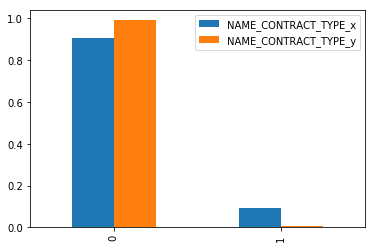

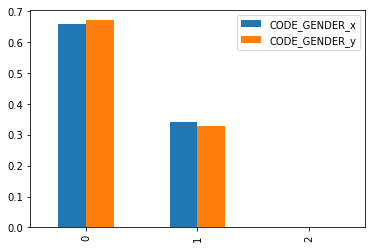

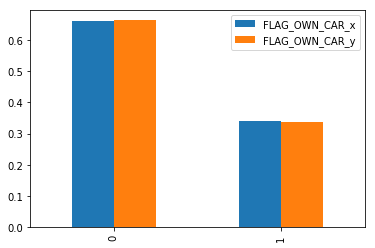

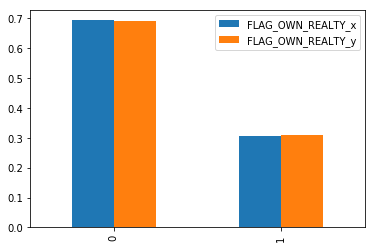

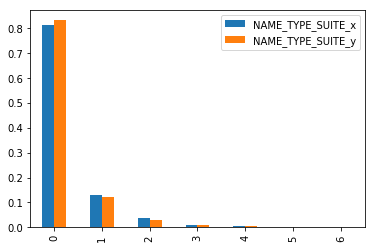

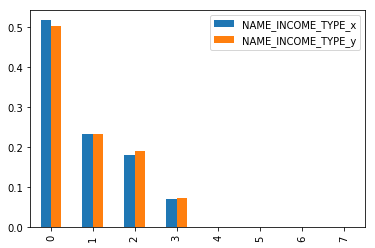

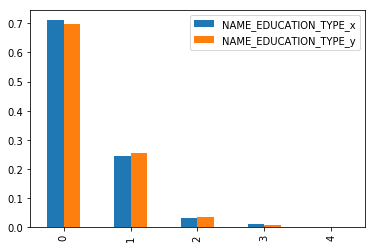

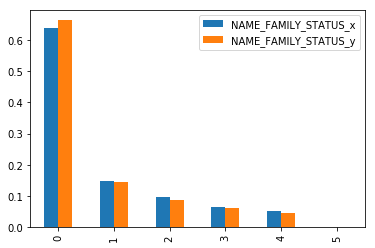

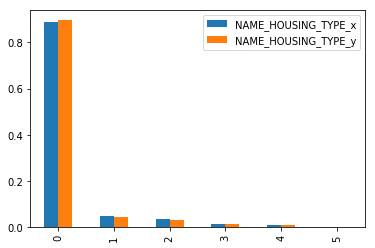

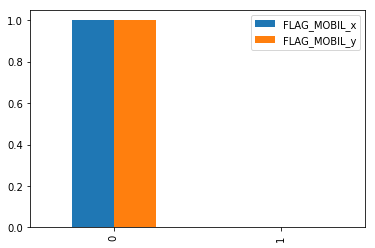

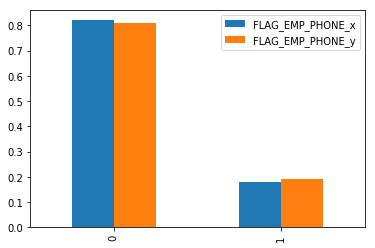

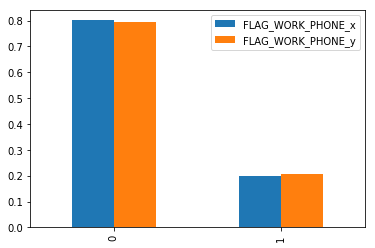

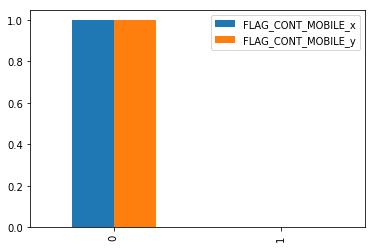

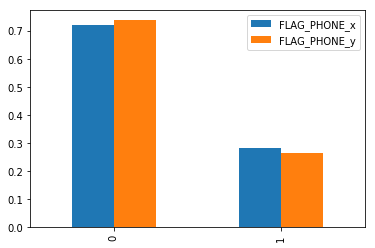

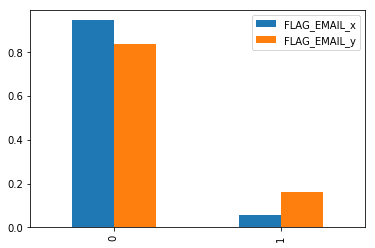

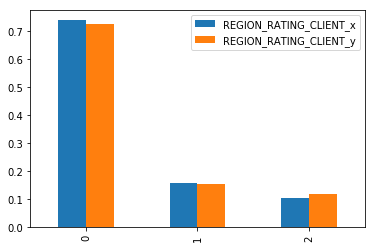

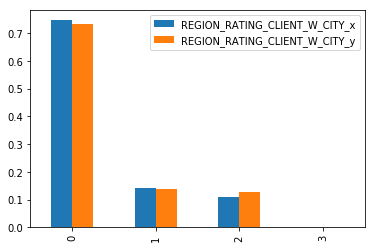

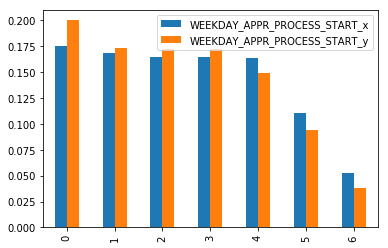

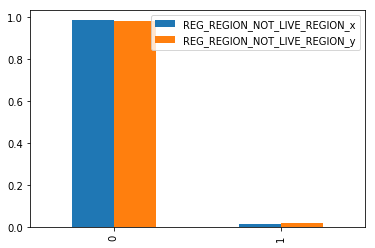

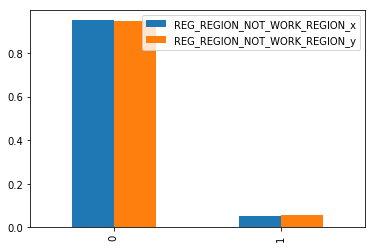

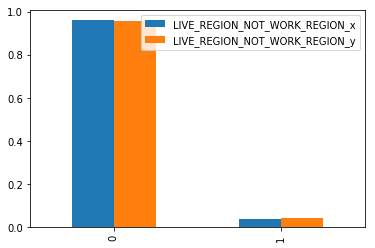

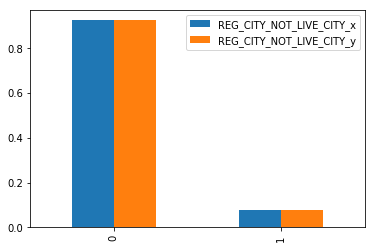

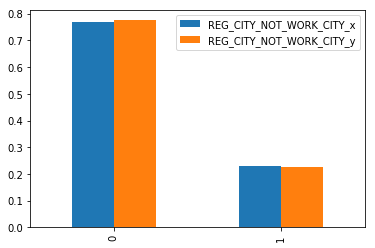

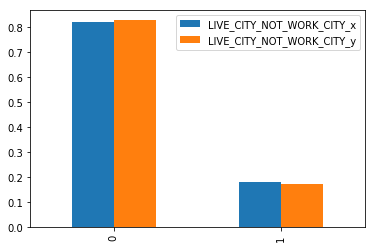

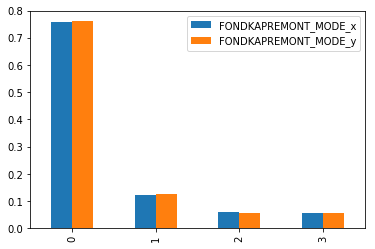

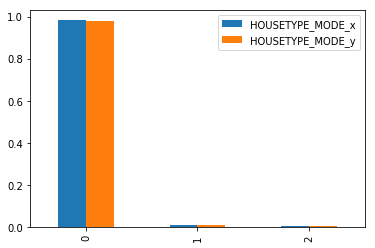

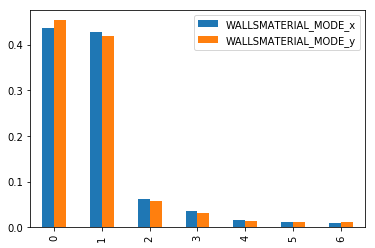

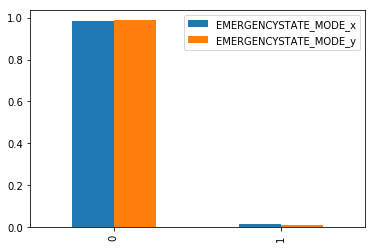

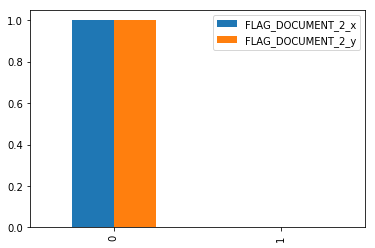

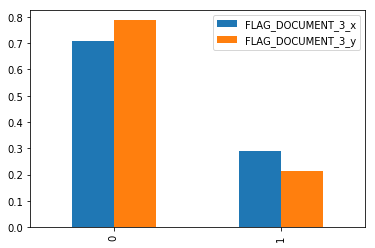

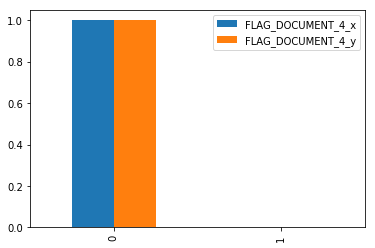

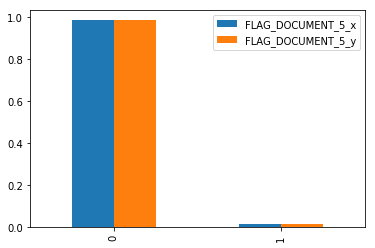

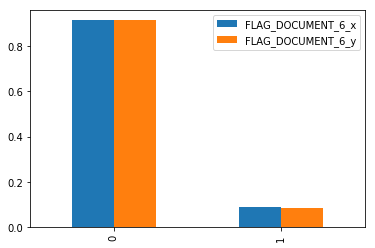

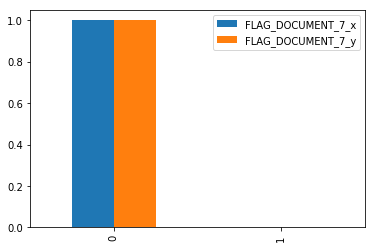

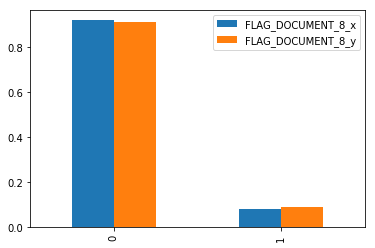

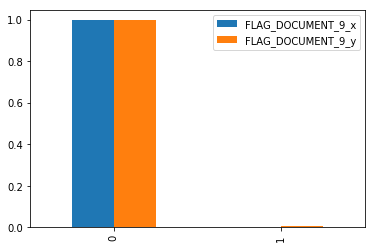

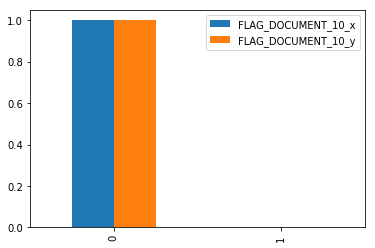

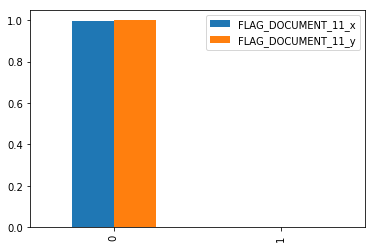

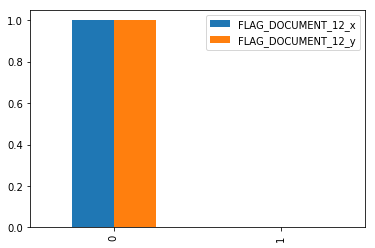

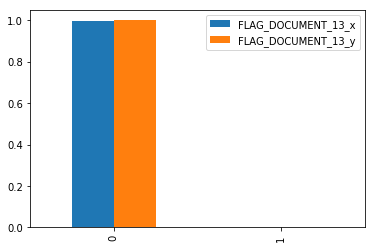

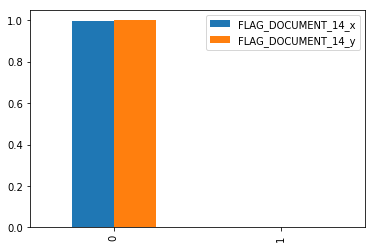

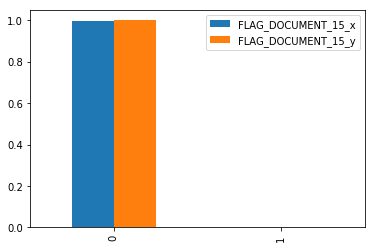

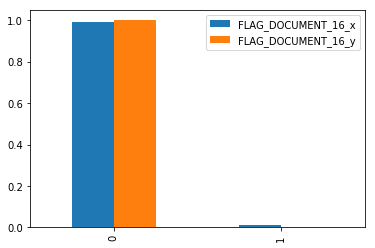

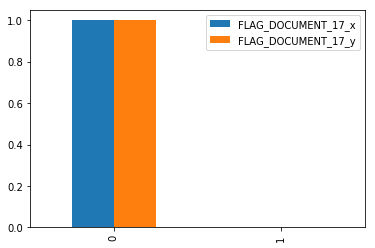

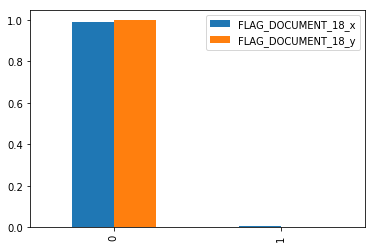

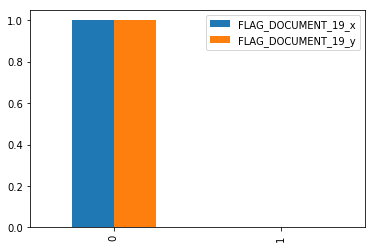

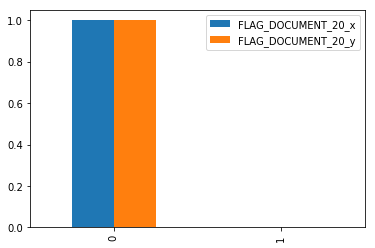

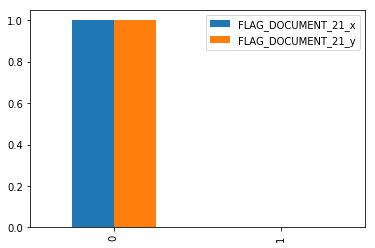

In [12]:
for i in application_train_columns_categorical:
    if i in application_train.columns and i in application_test.columns:
        tmp = compareCat(i)
        if tmp.shape[0] <= 10:
            
            print("----------------" + i + "--------------")
            print(tmp[[i+"_x",i+"_y"]].plot(kind="bar"))

In [61]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)

Populating the interactive namespace from numpy and matplotlib


/home/matia_alexander/miniconda3/envs/deeplearning/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


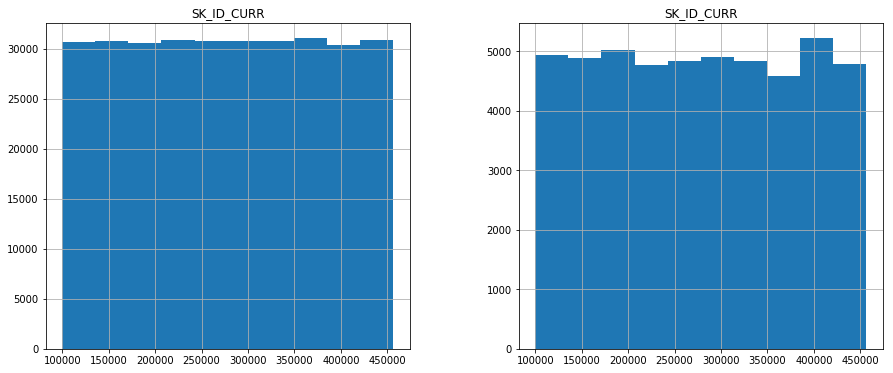

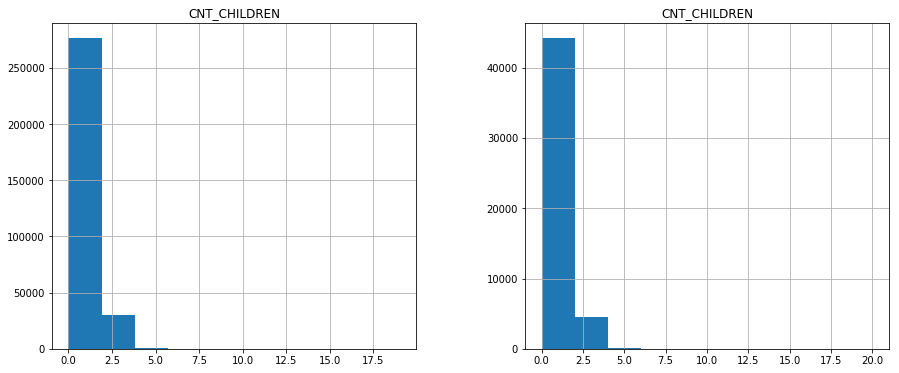

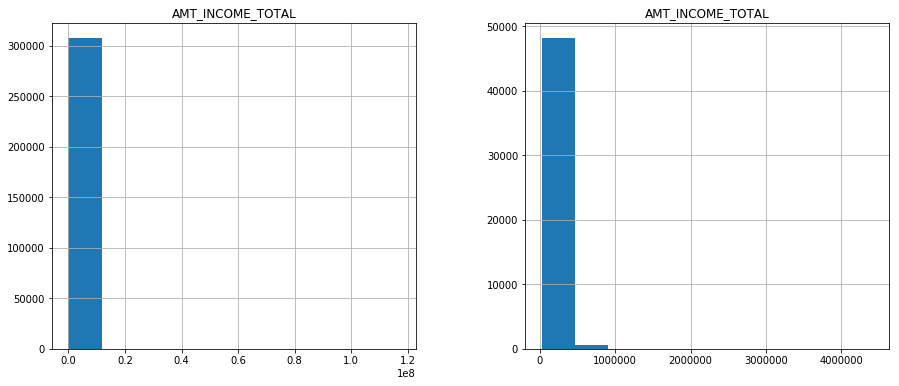

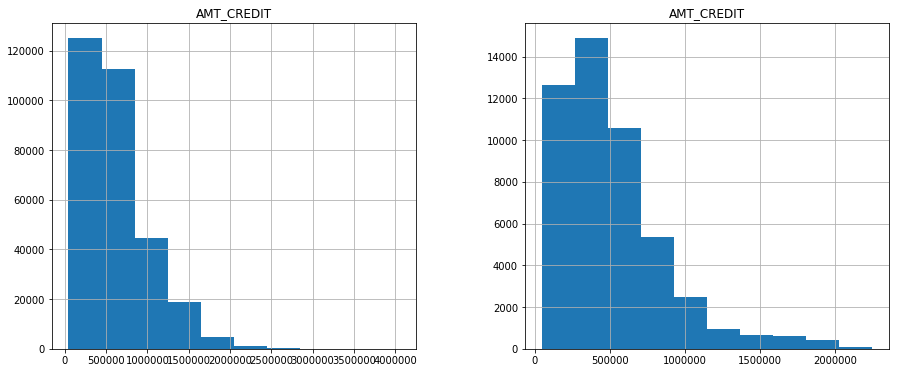

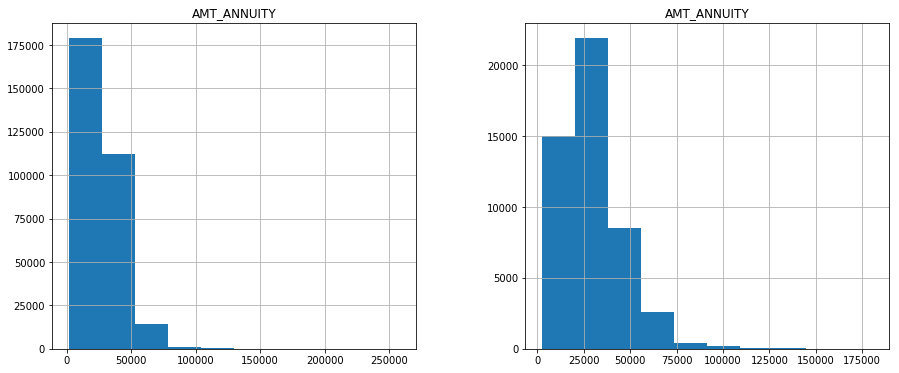

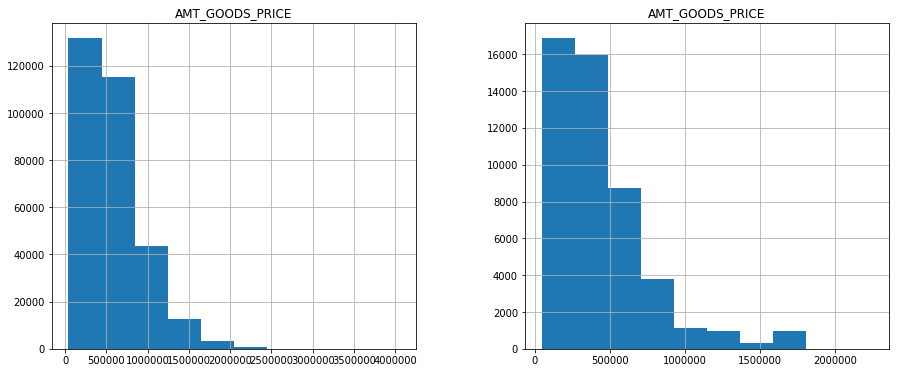

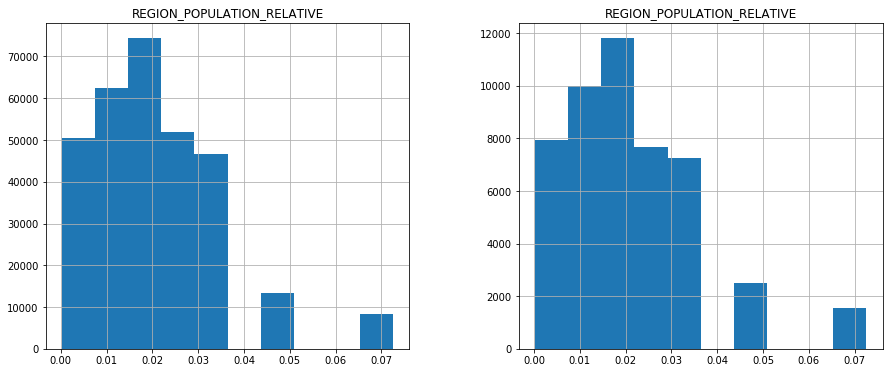

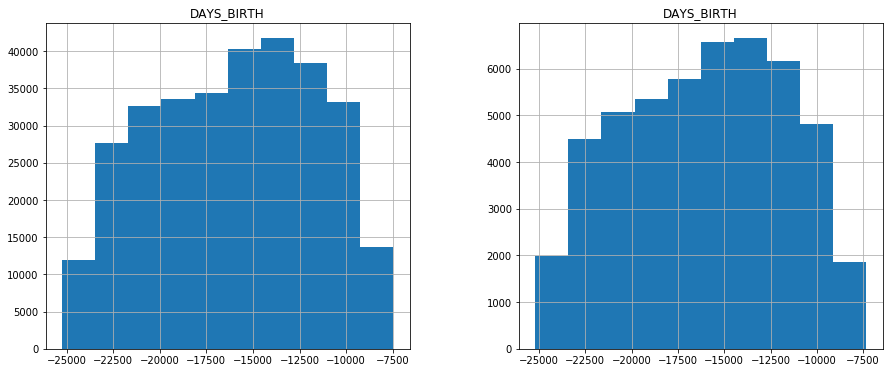

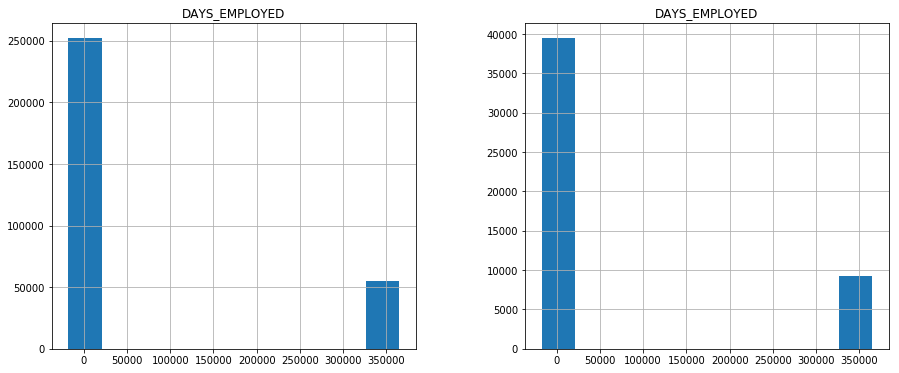

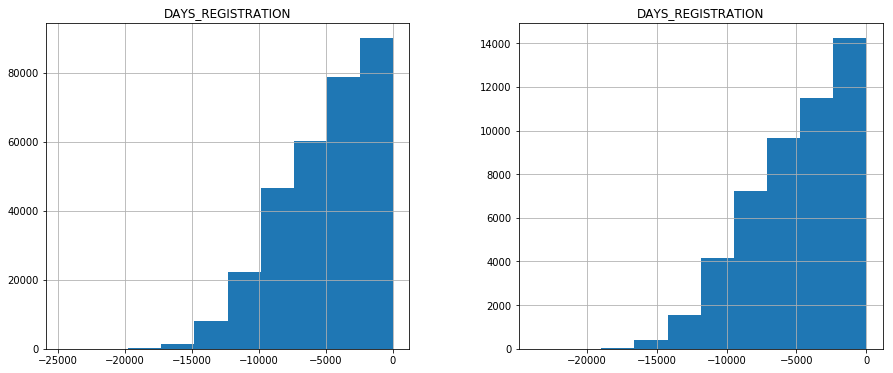

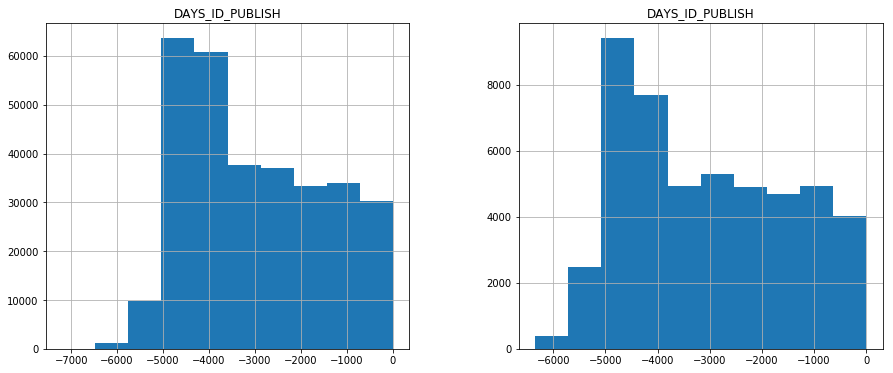

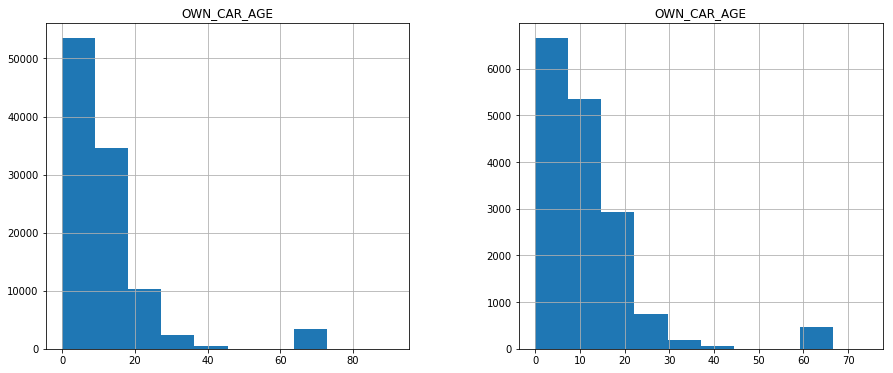

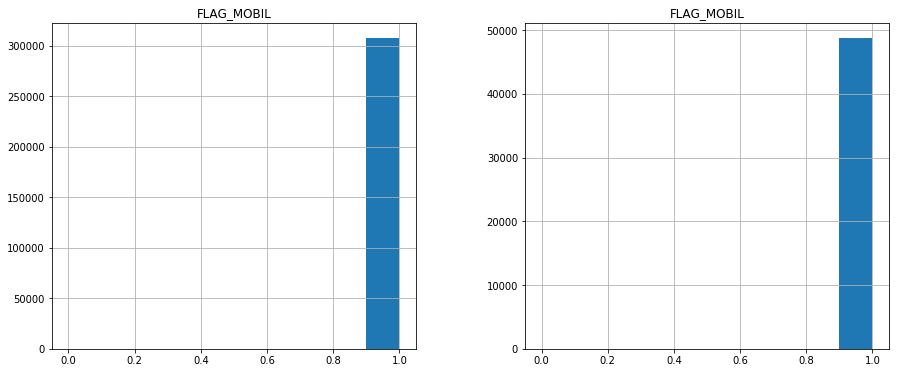

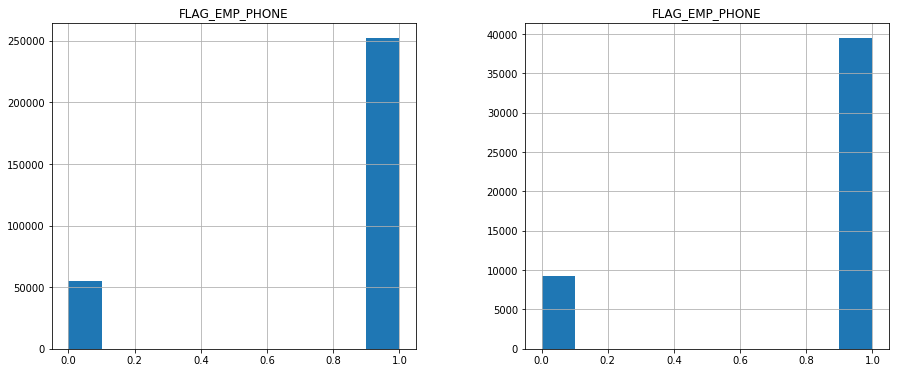

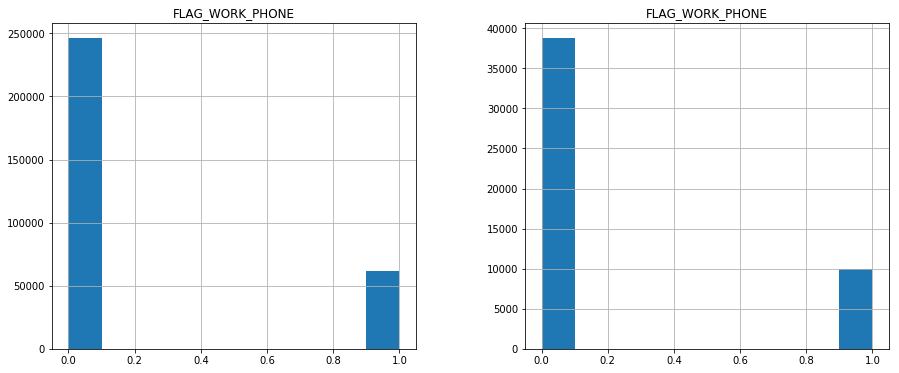

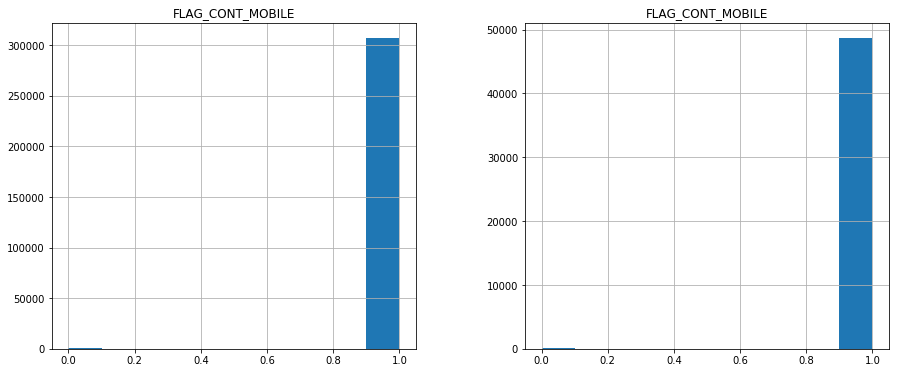

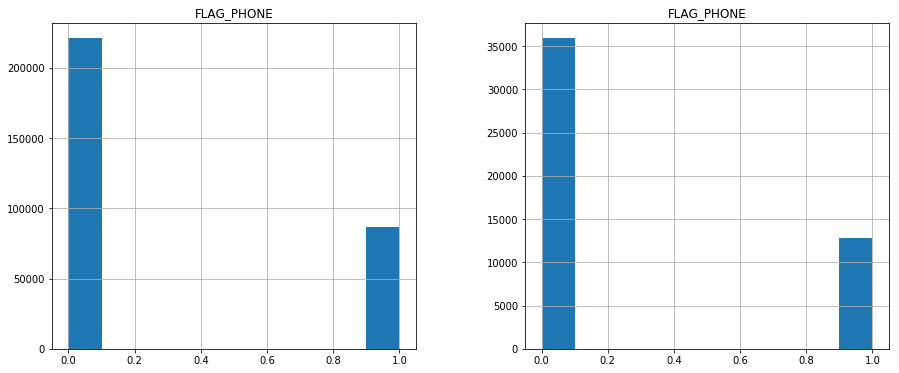

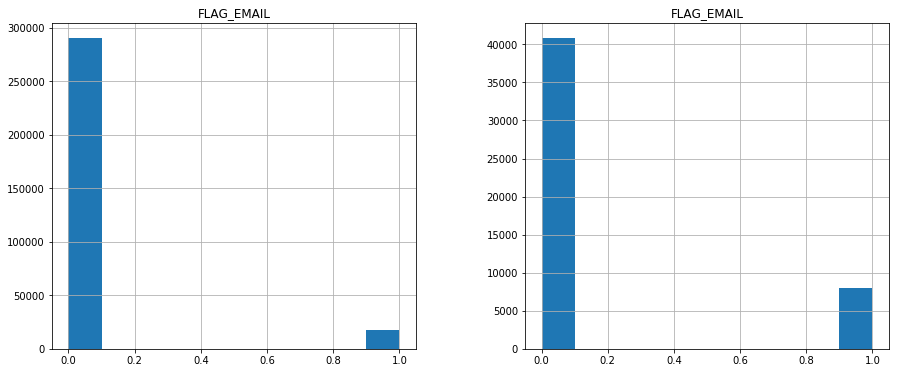

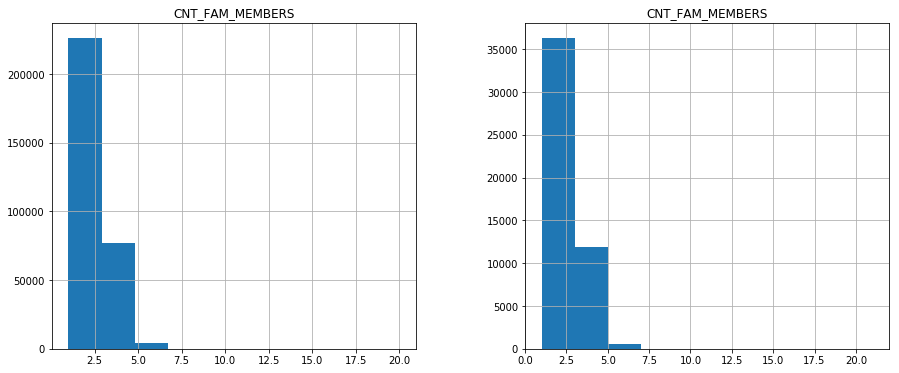

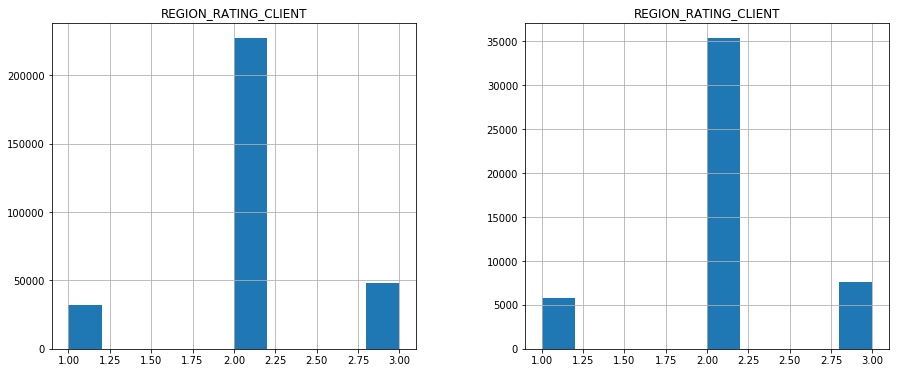

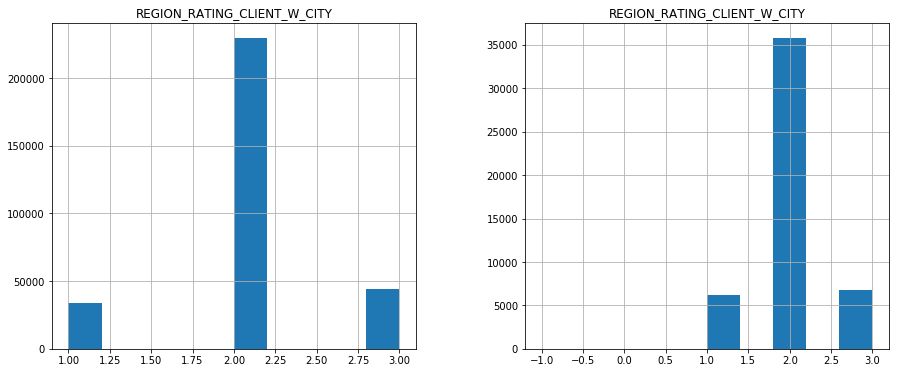

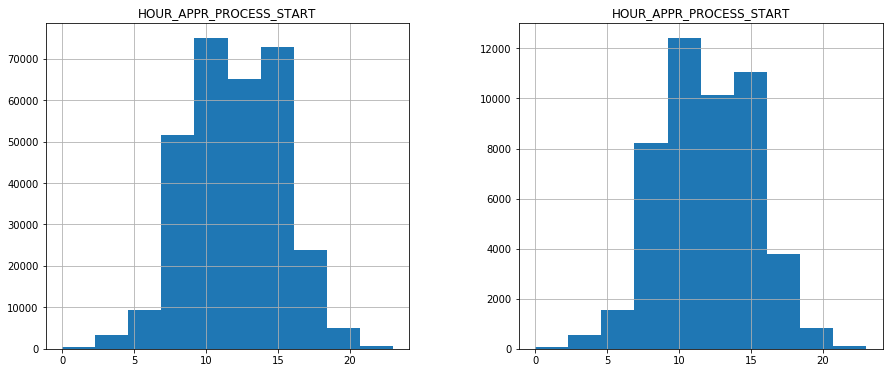

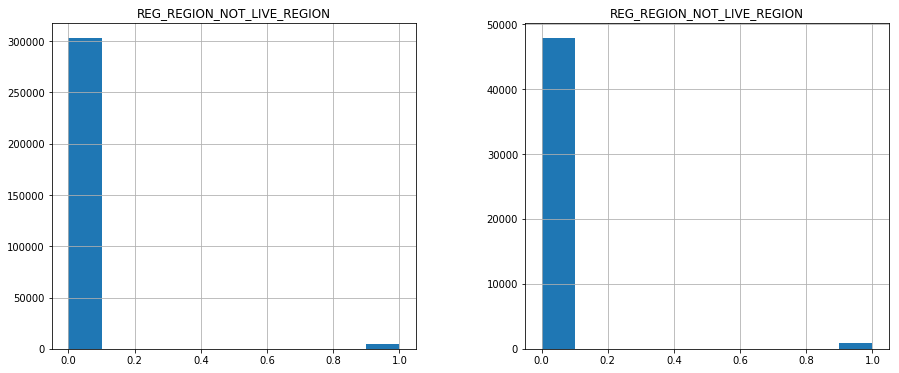

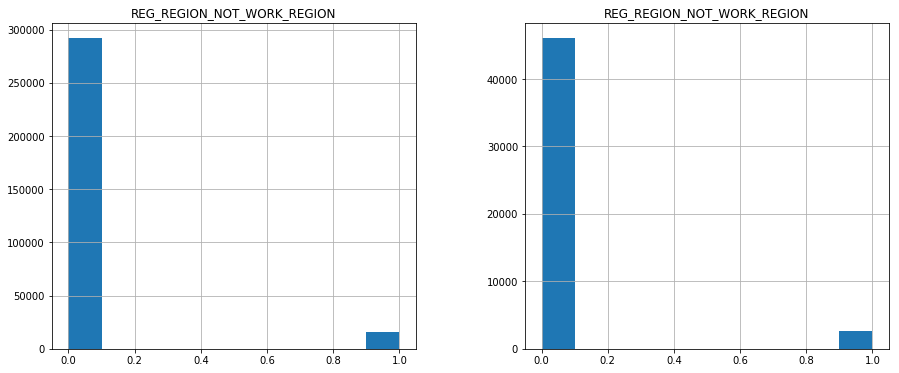

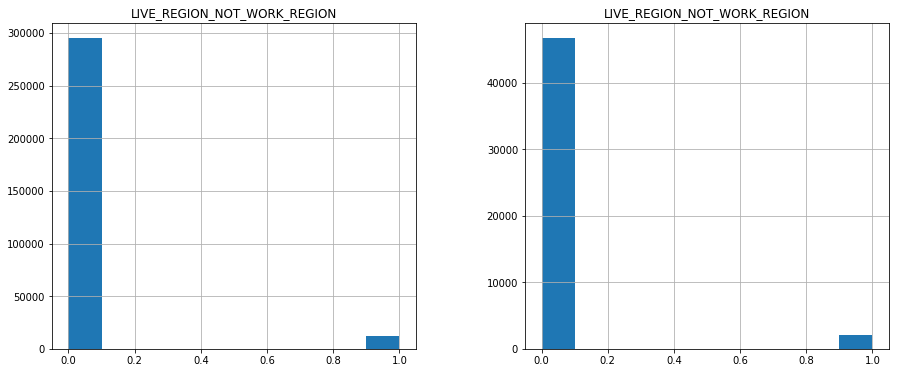

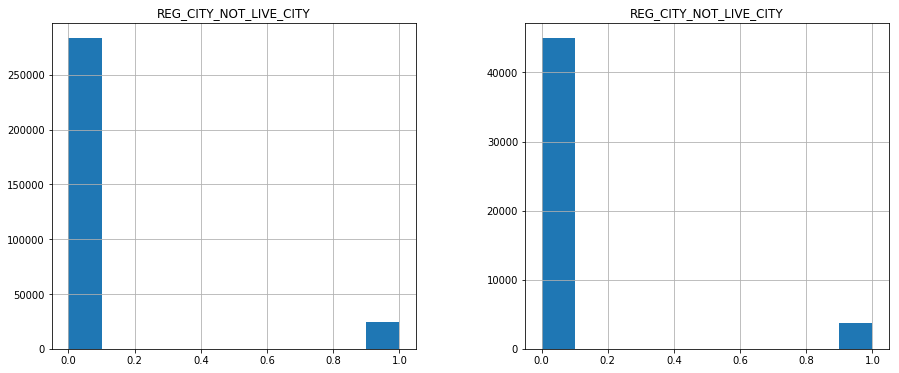

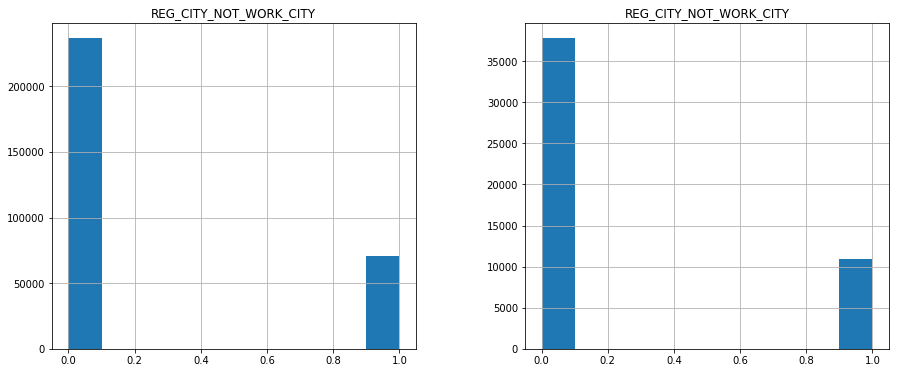

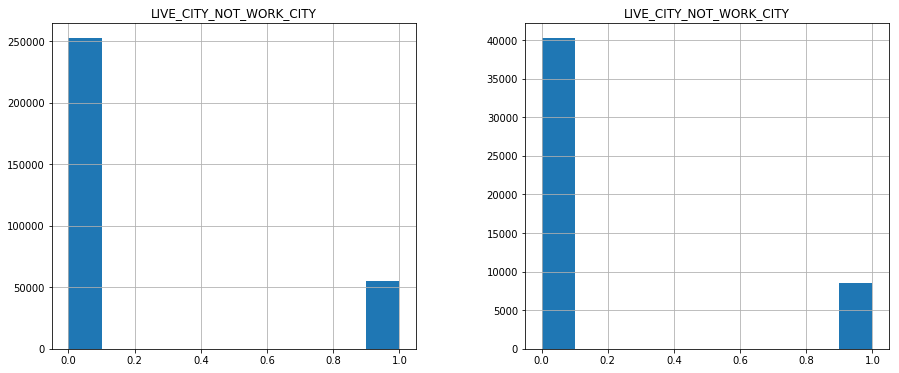

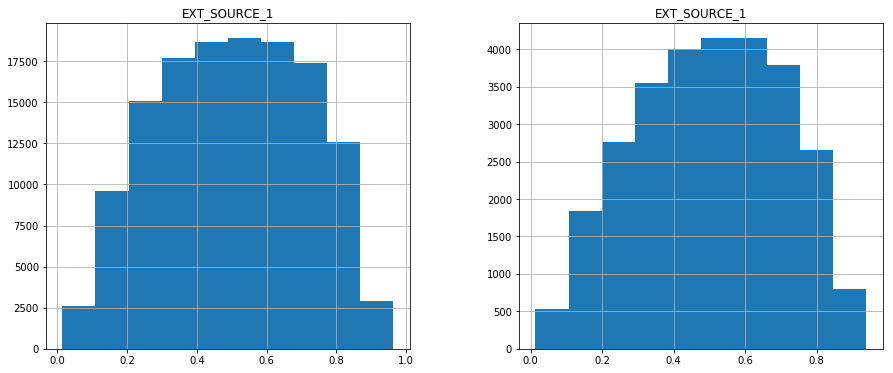

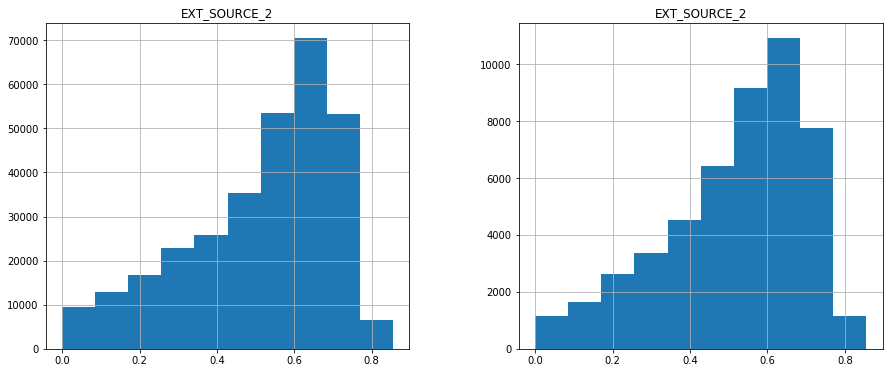

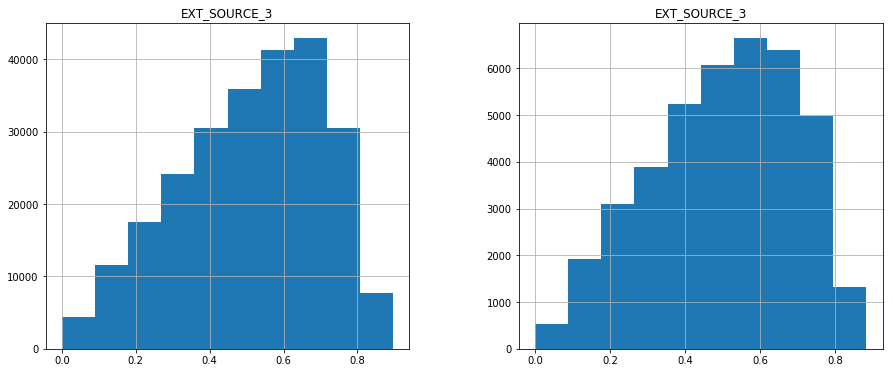

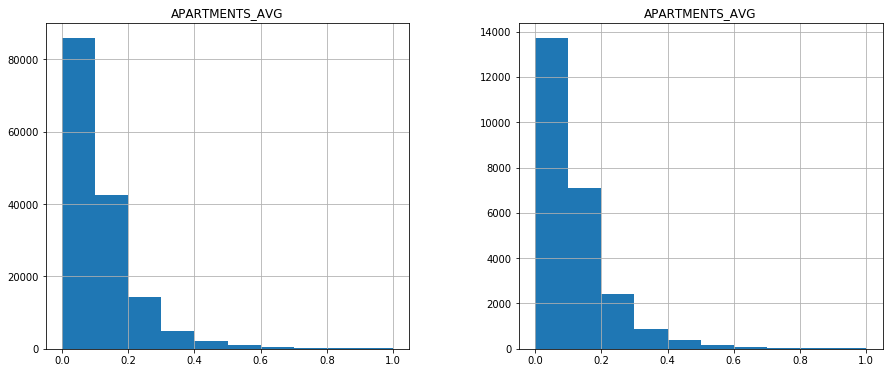

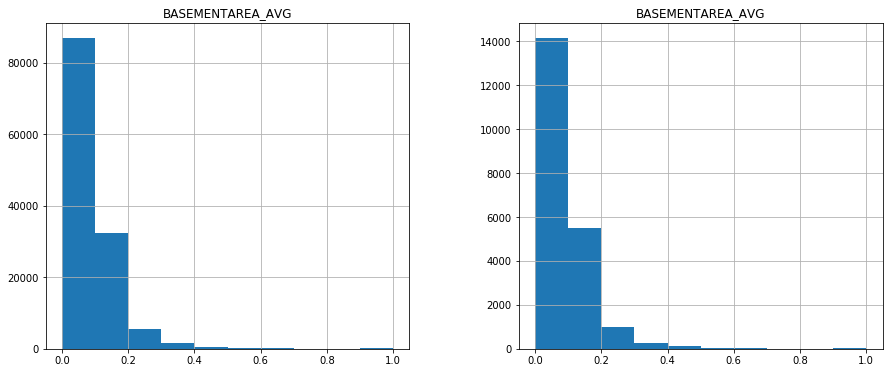

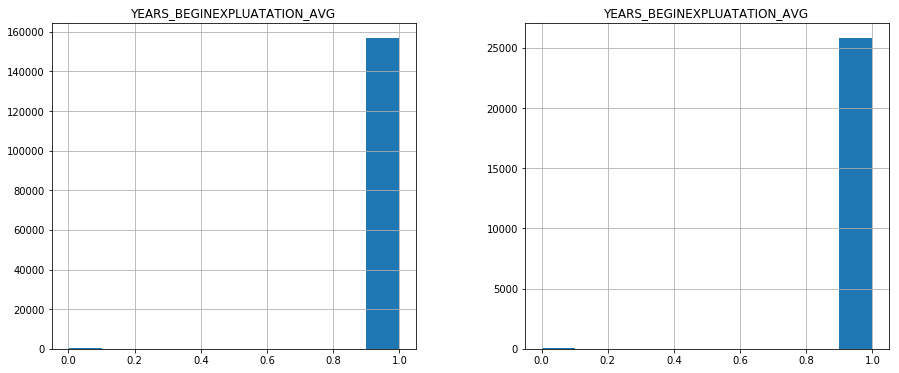

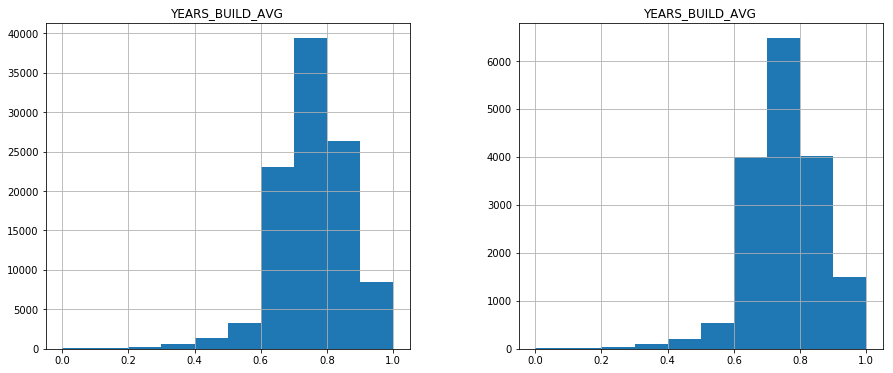

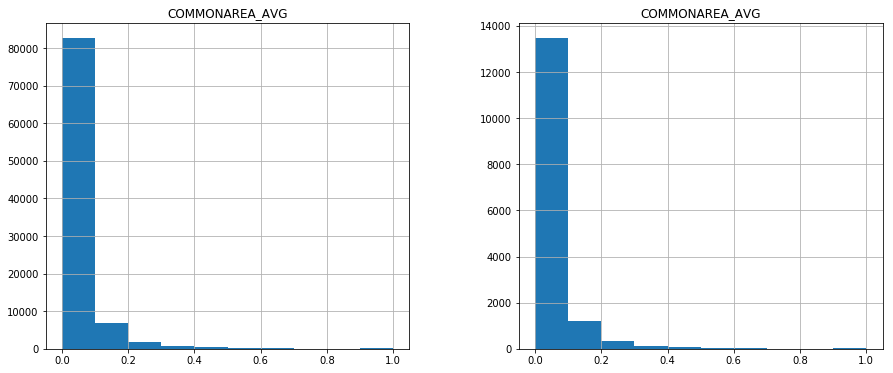

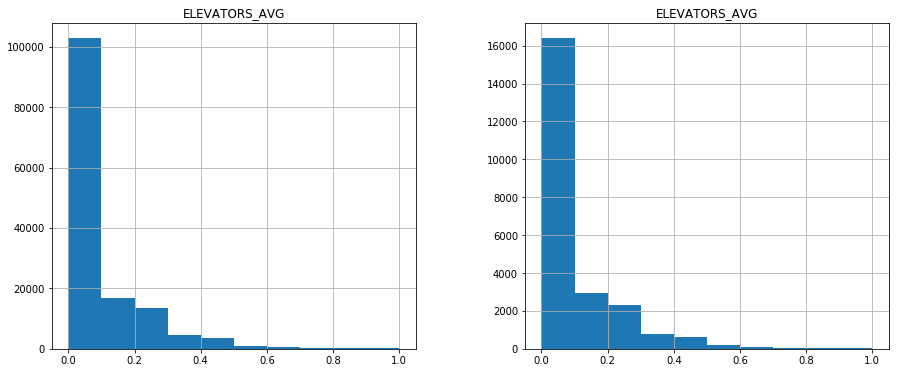

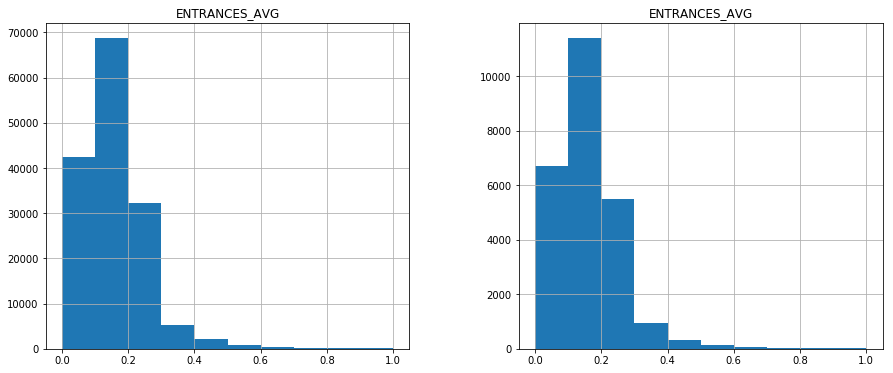

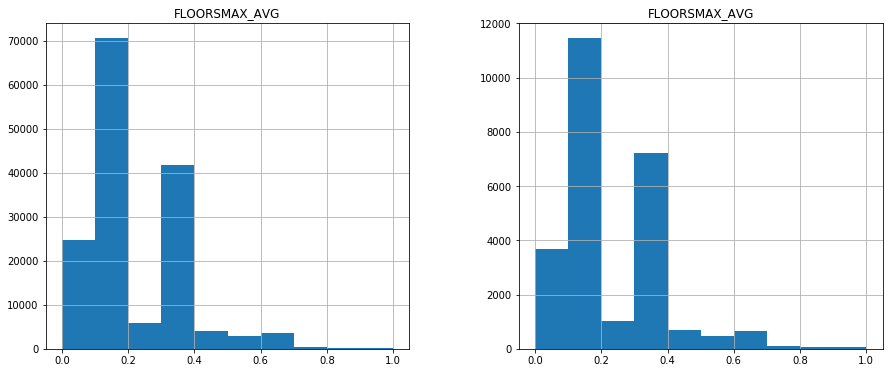

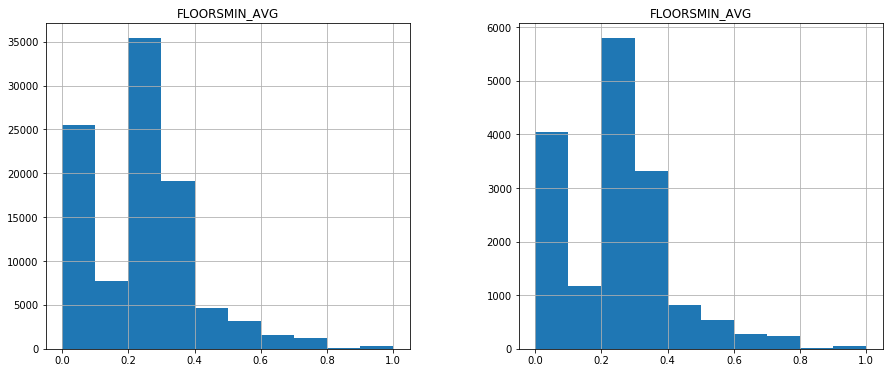

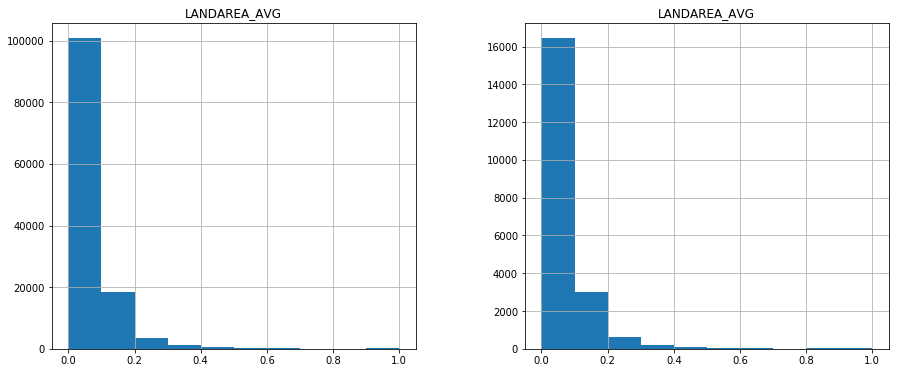

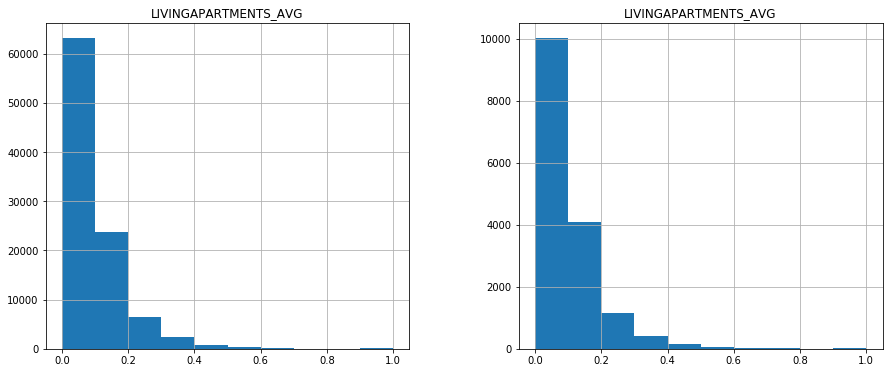

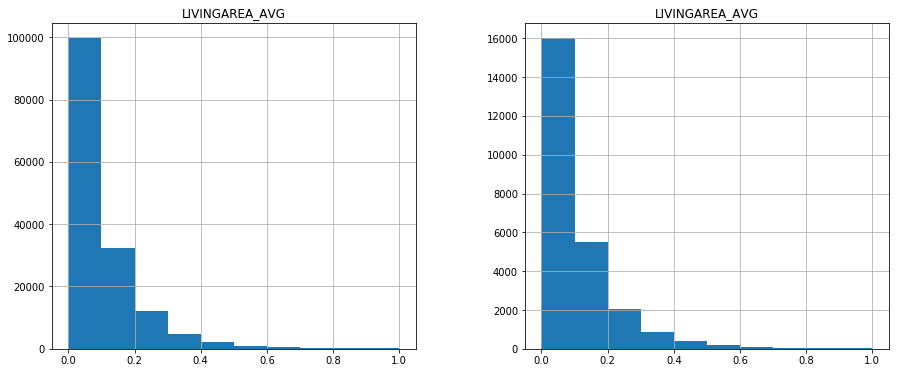

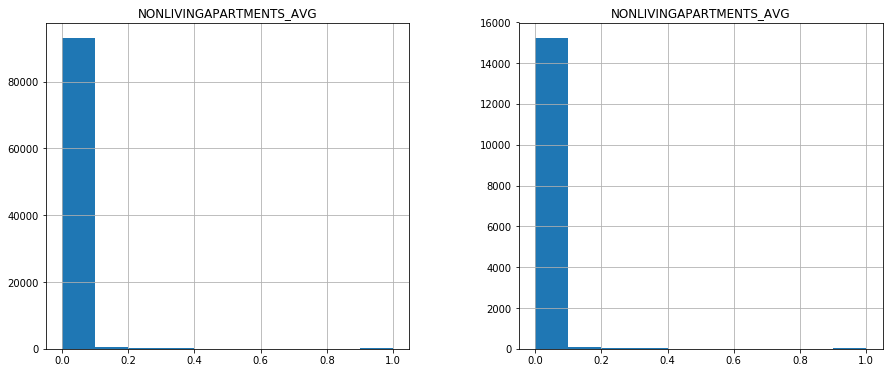

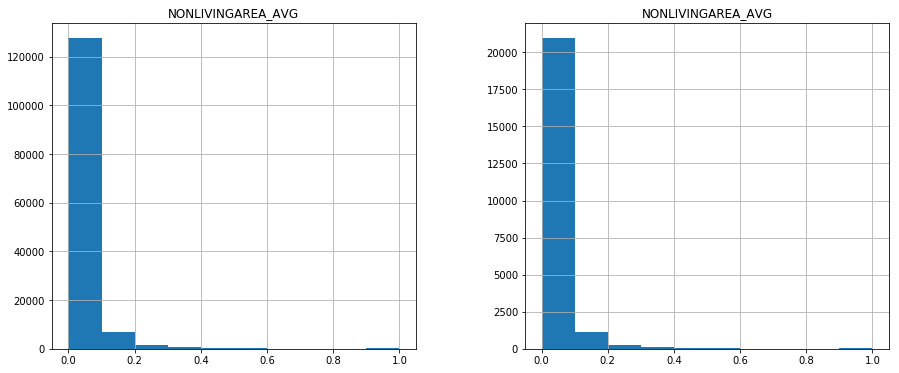

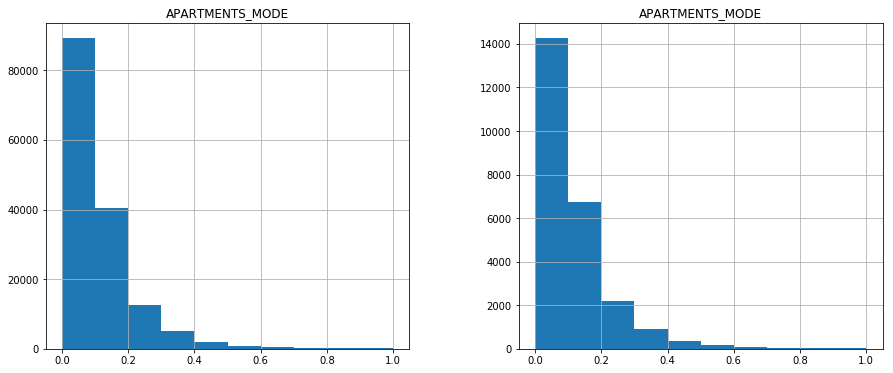

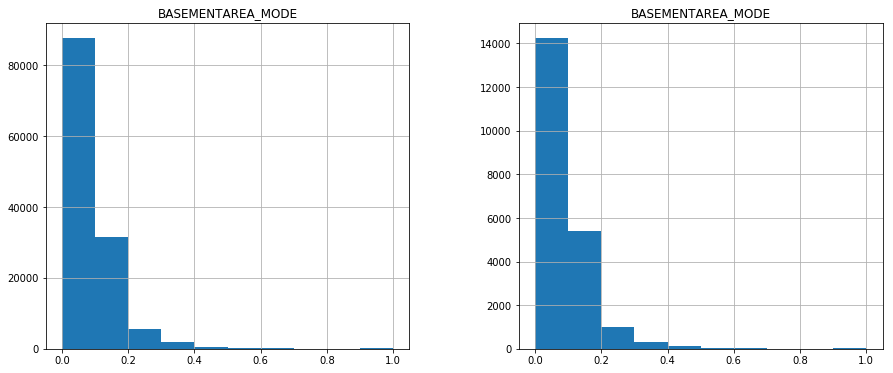

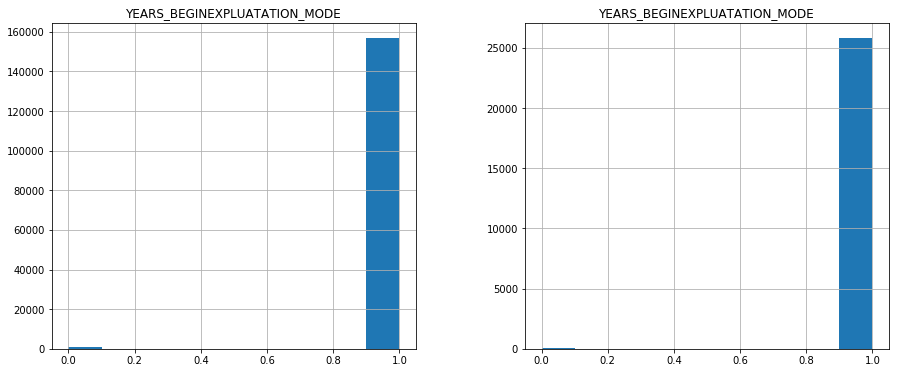

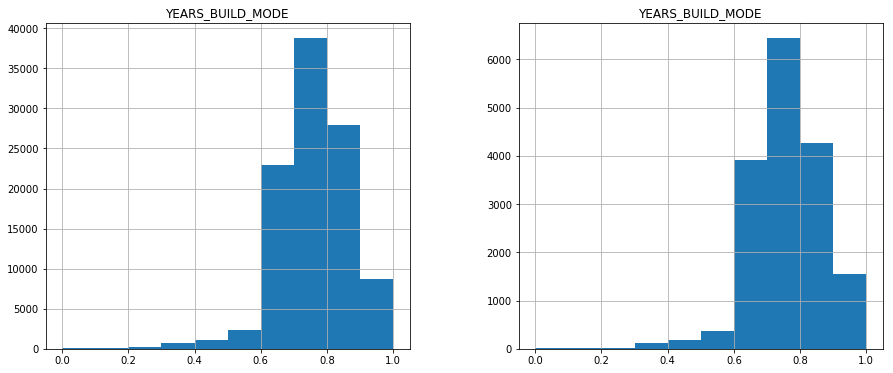

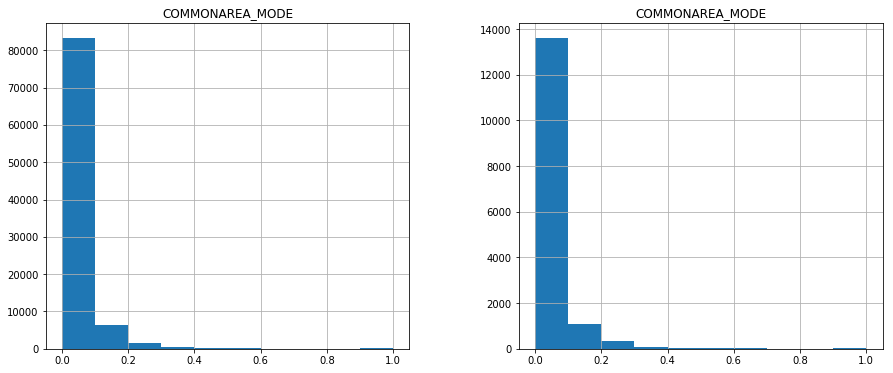

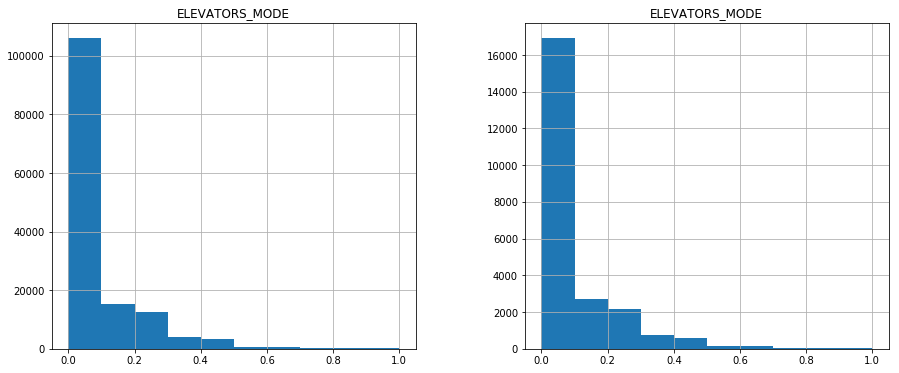

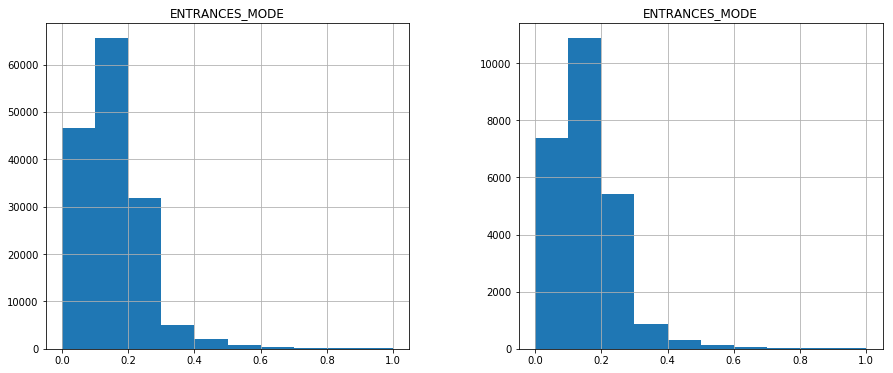

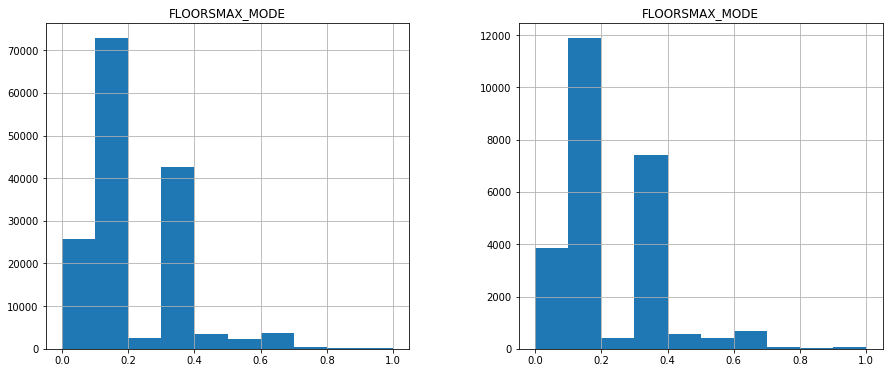

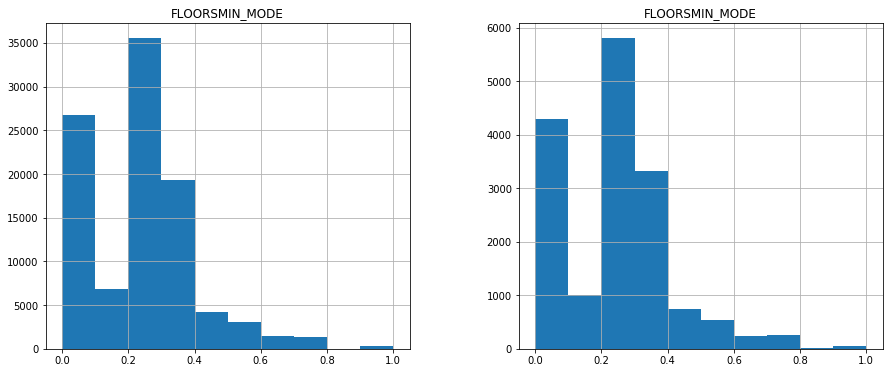

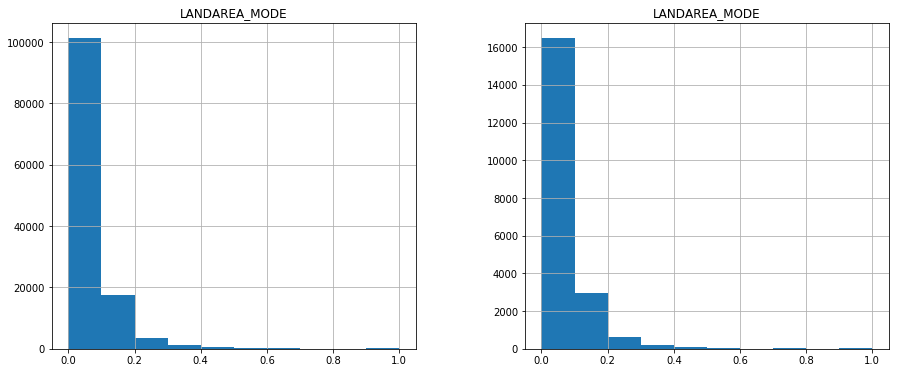

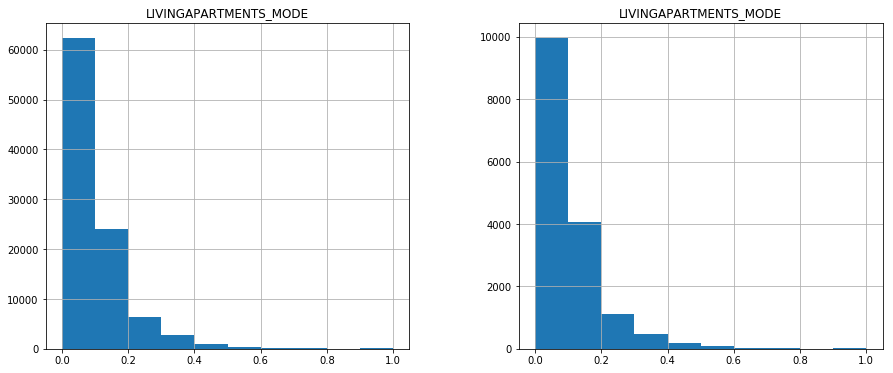

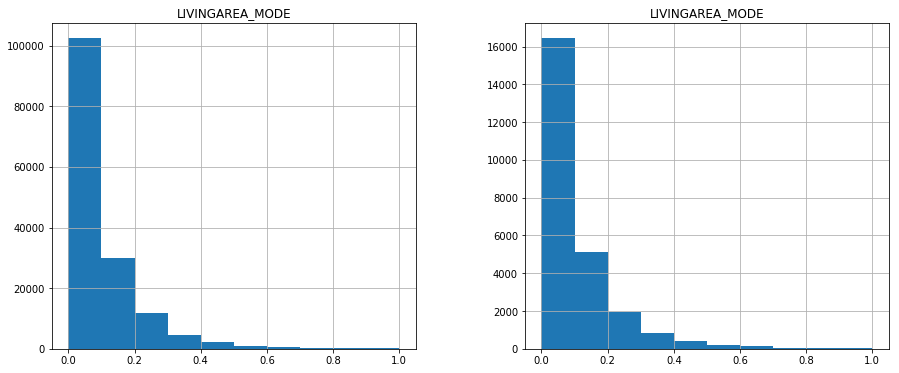

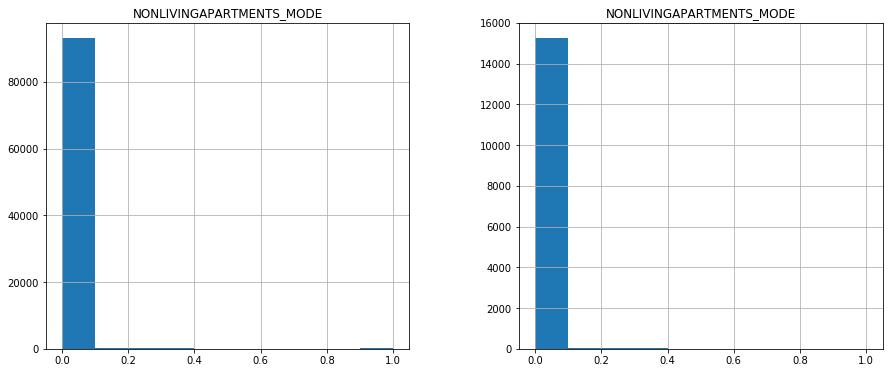

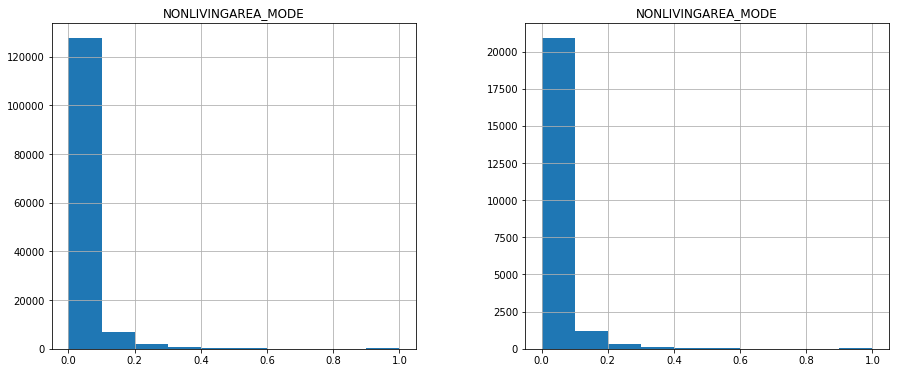

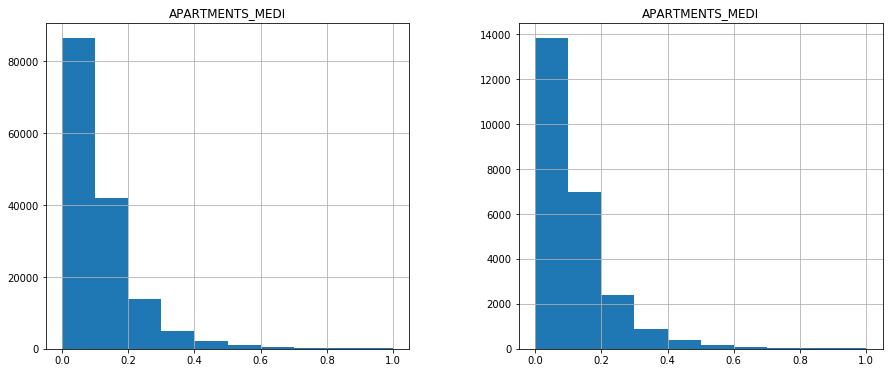

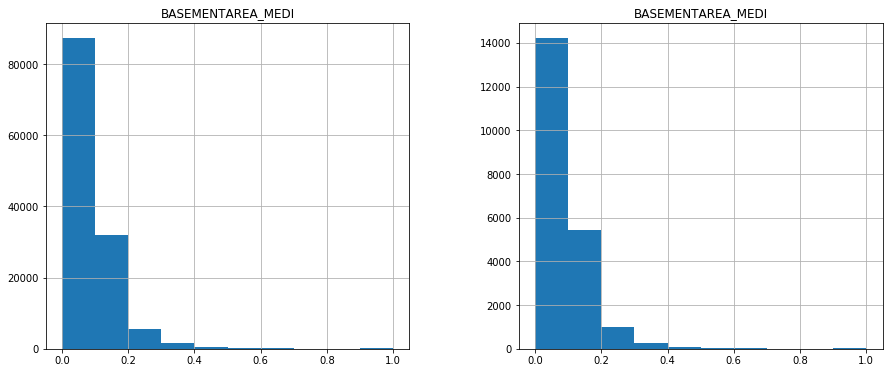

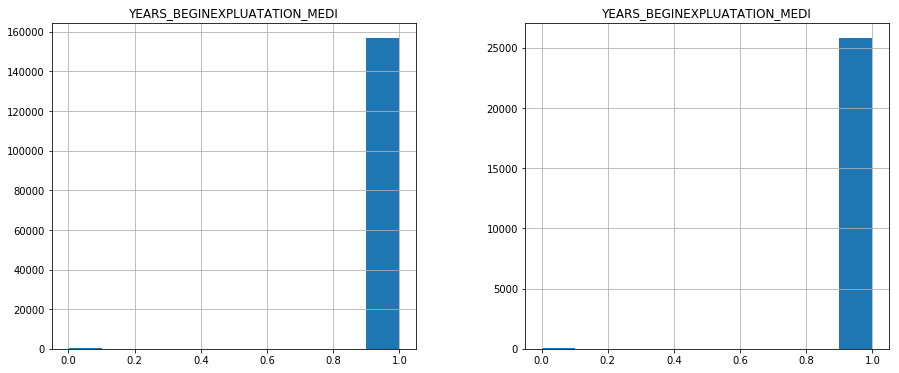

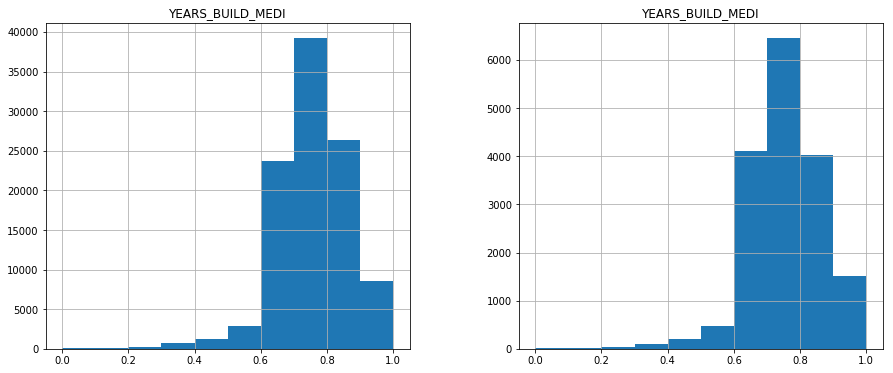

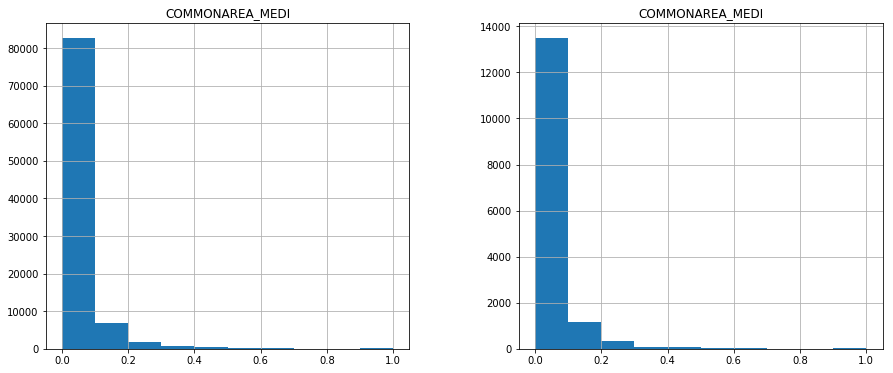

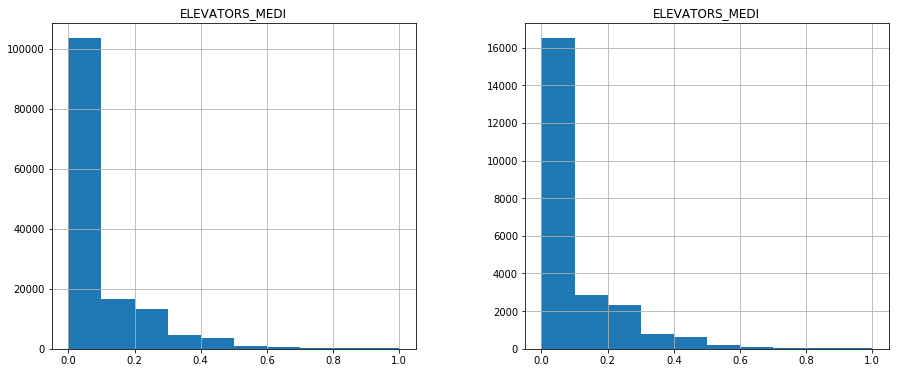

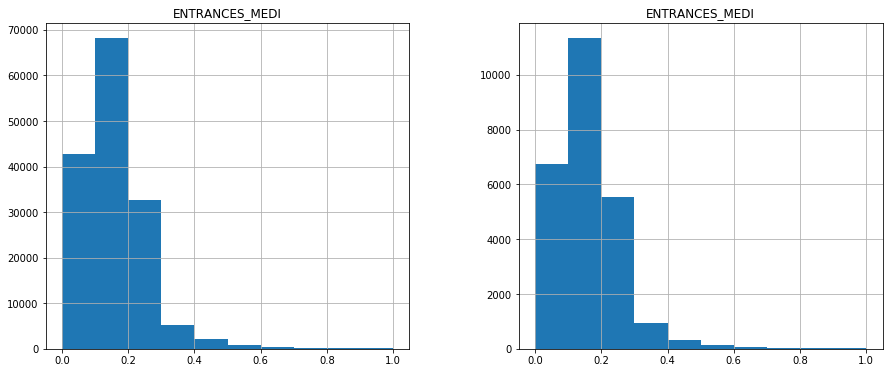

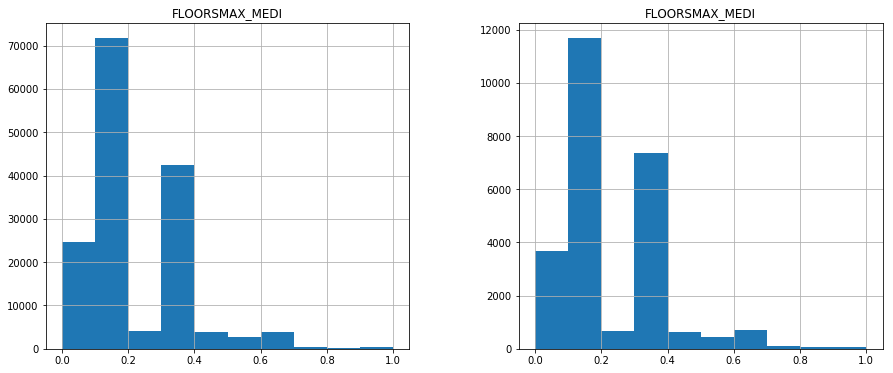

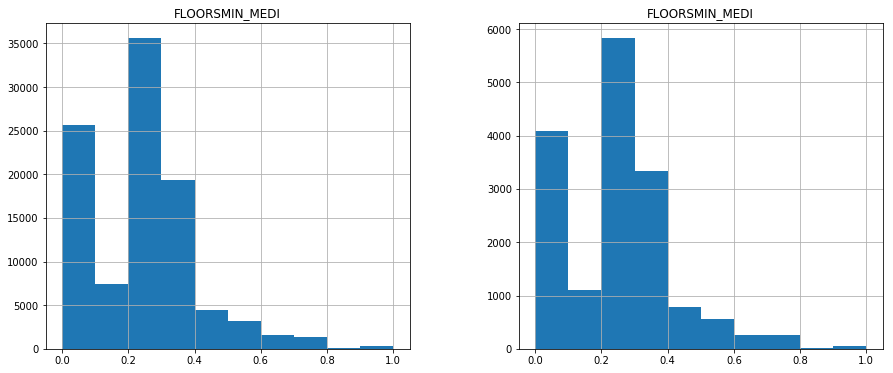

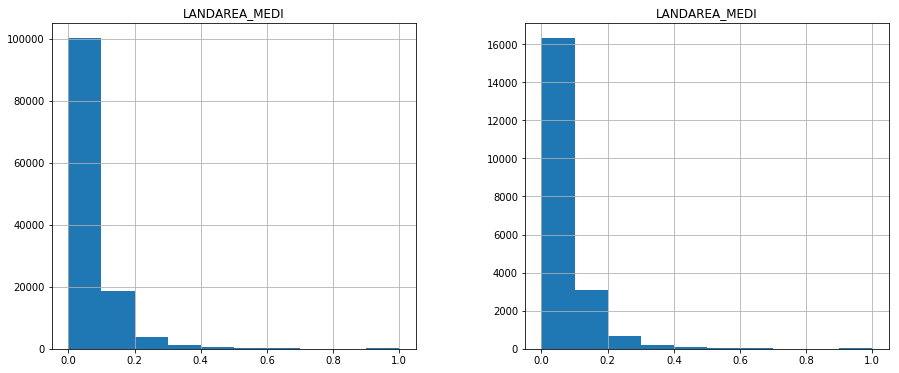

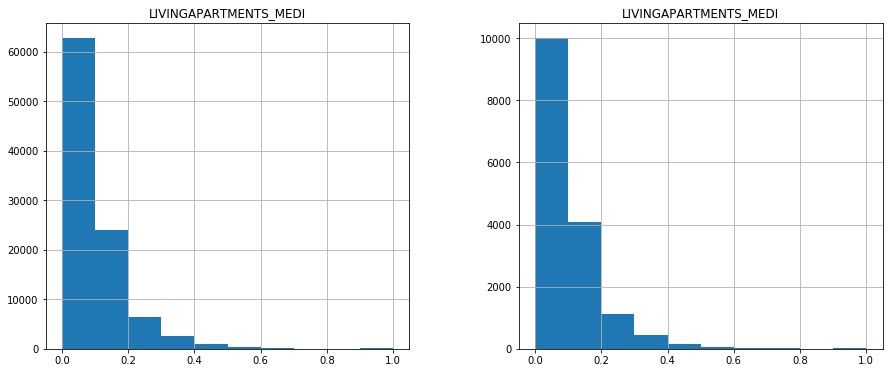

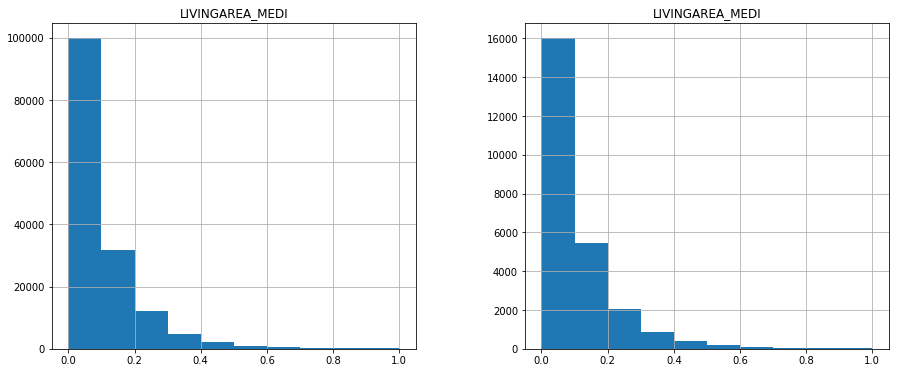

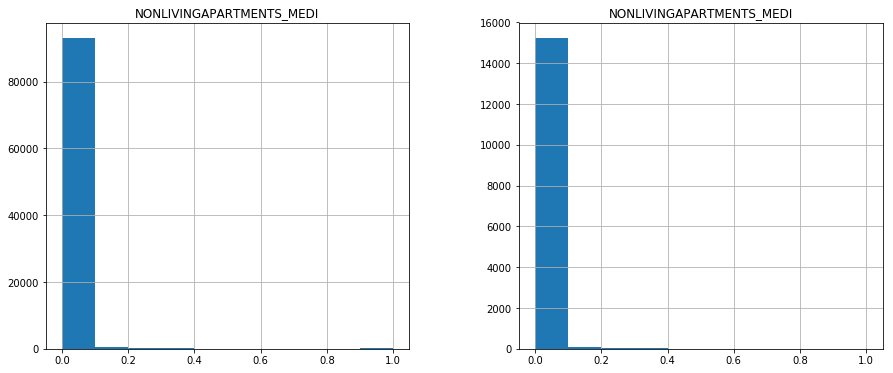

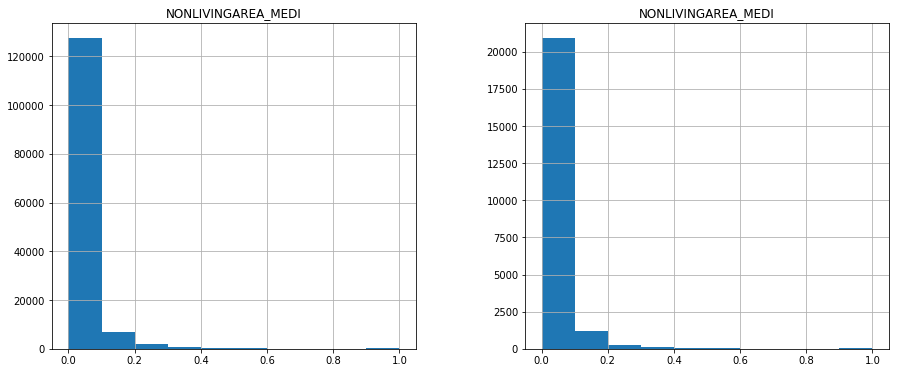

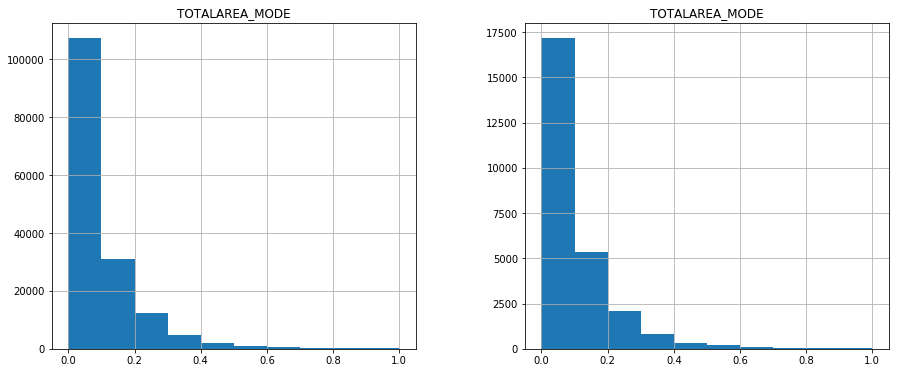

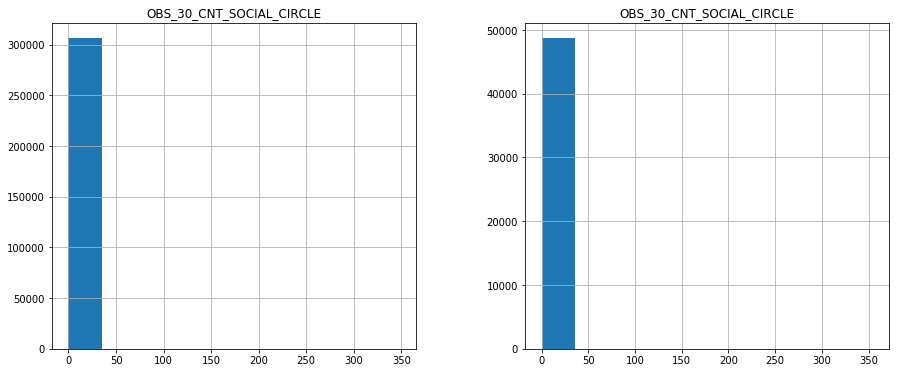

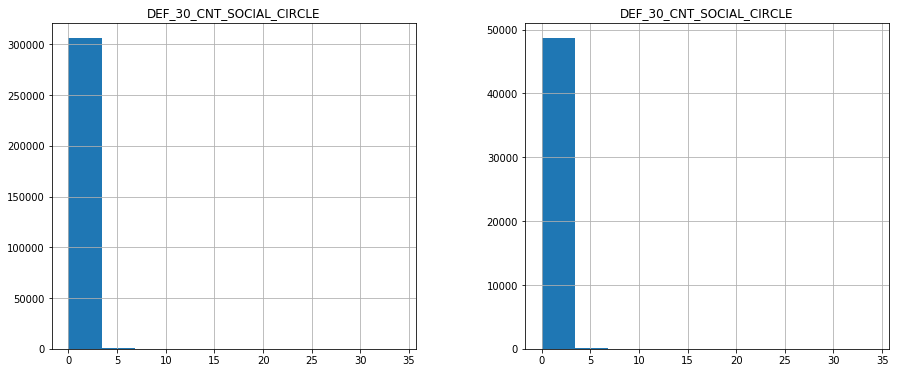

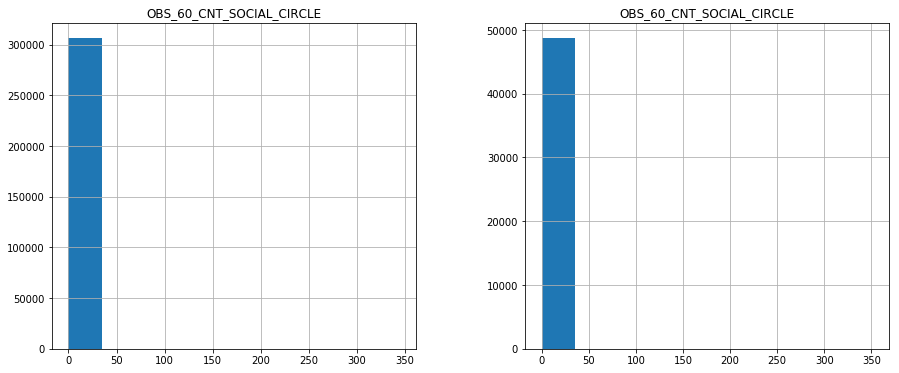

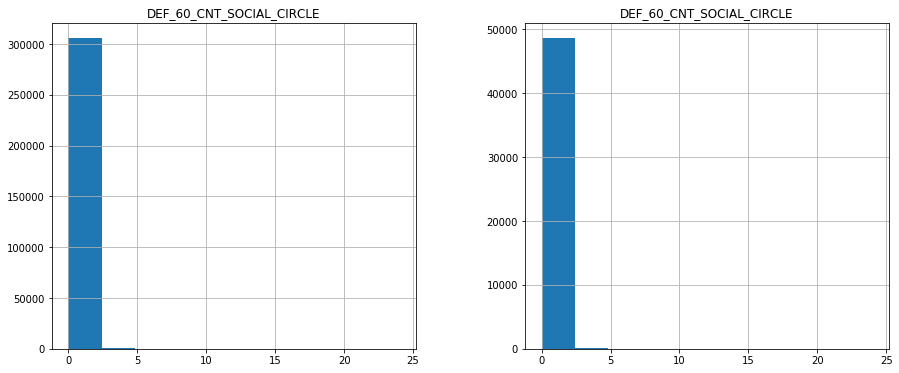

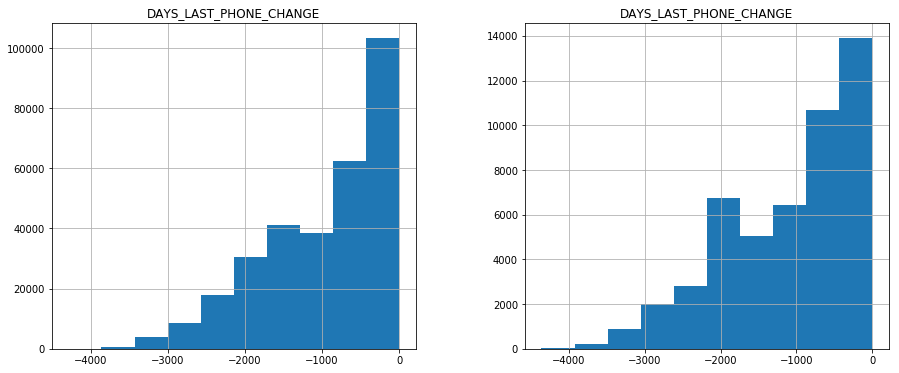

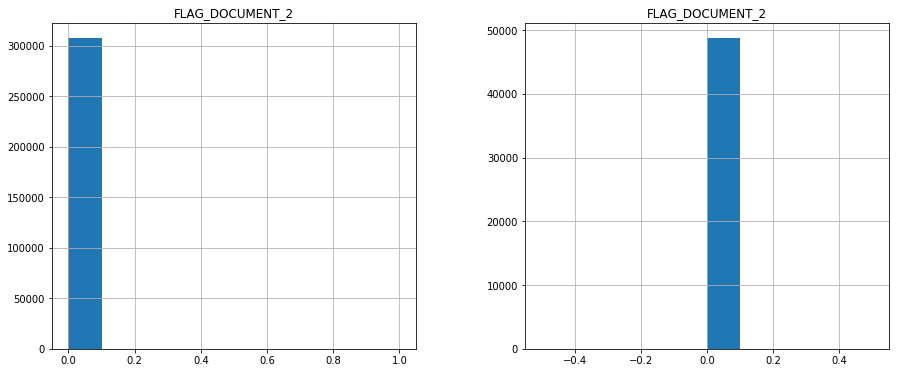

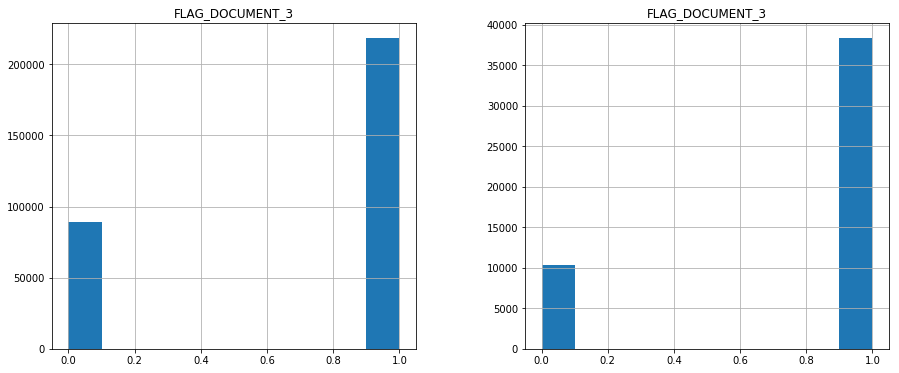

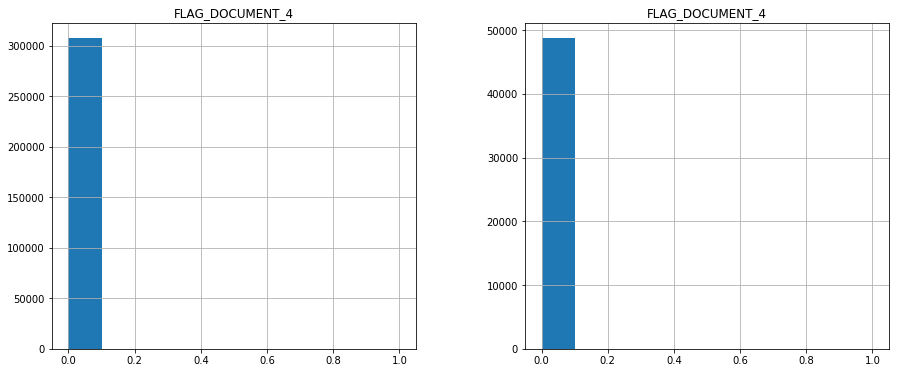

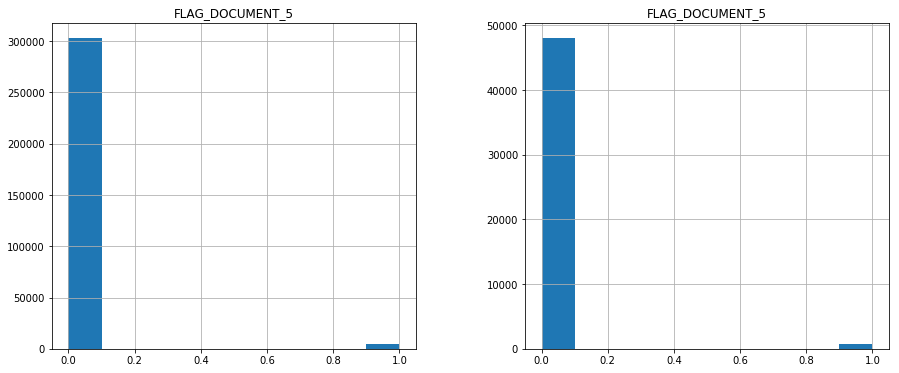

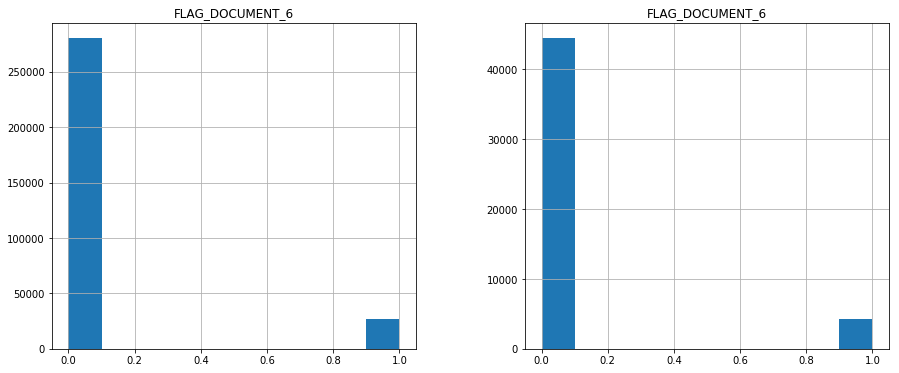

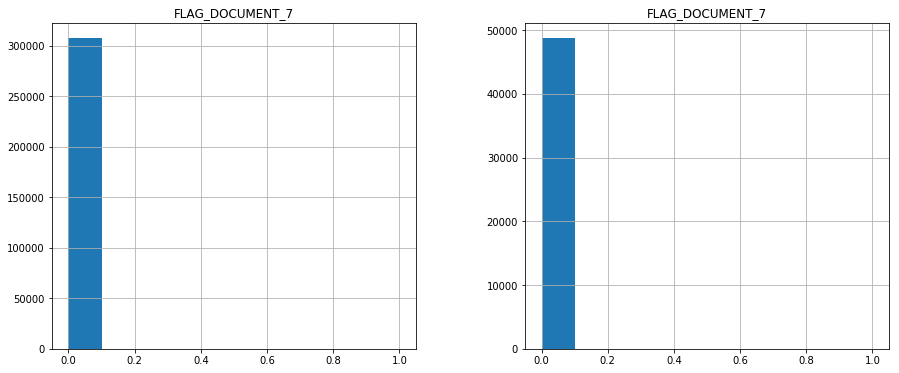

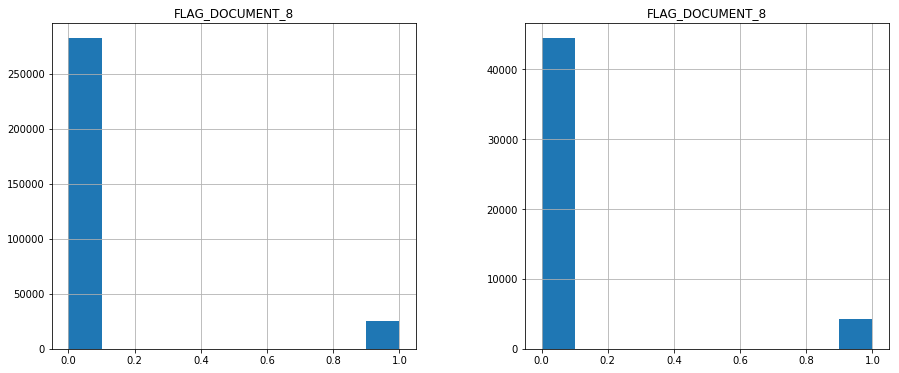

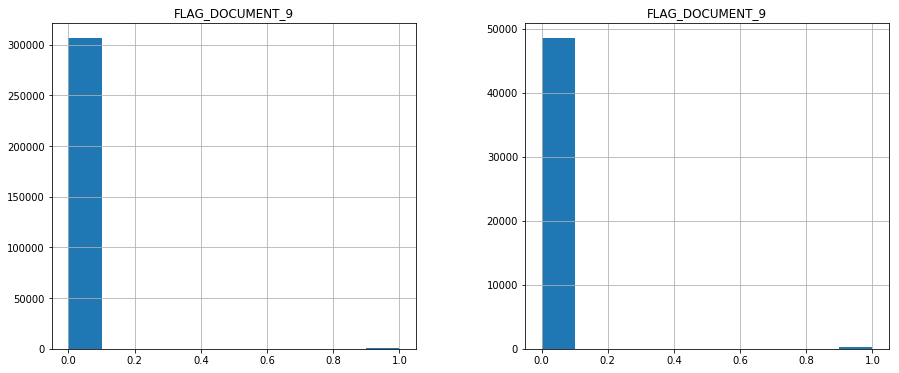

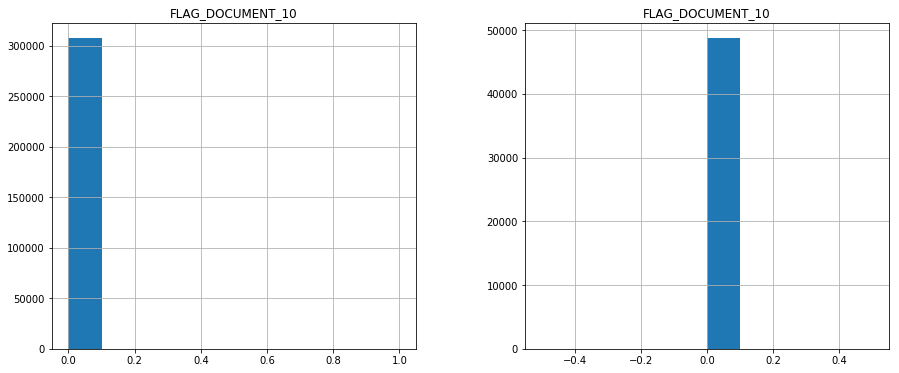

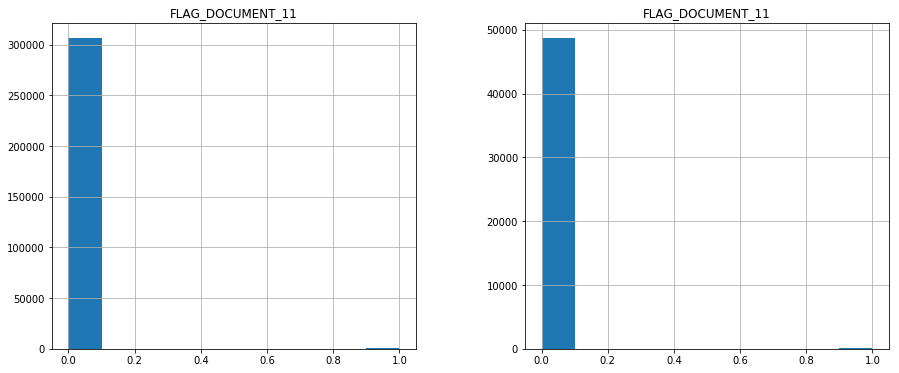

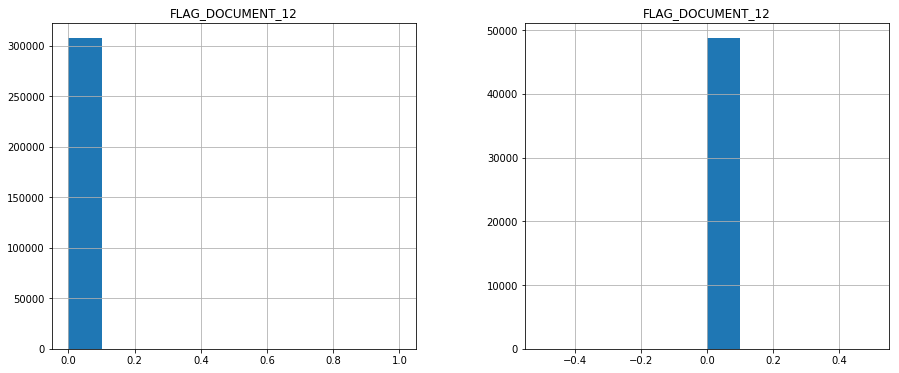

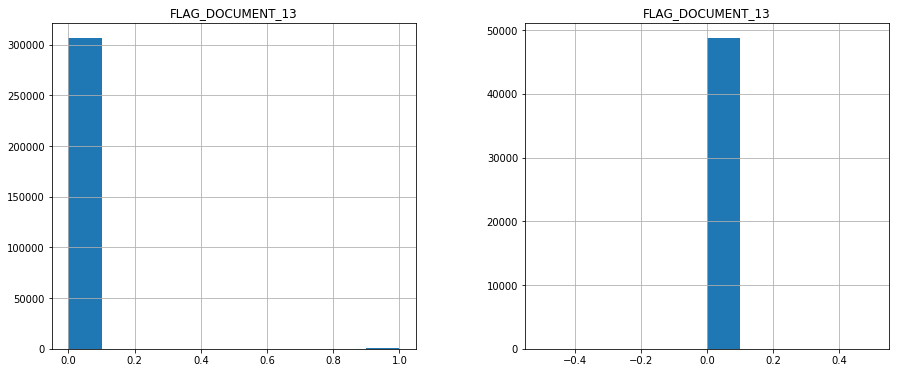

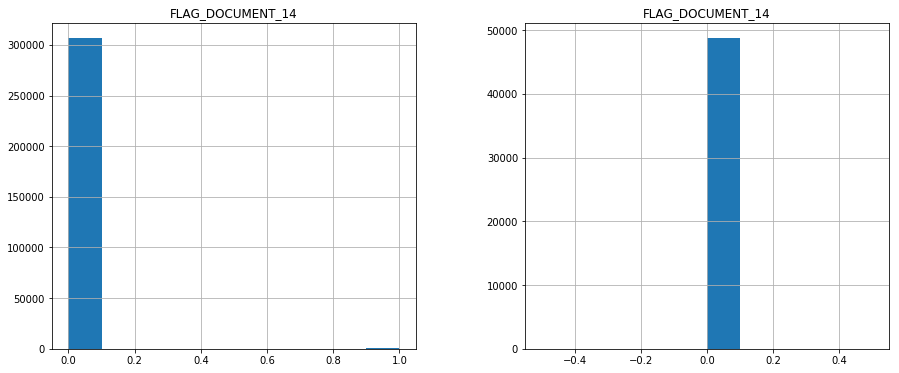

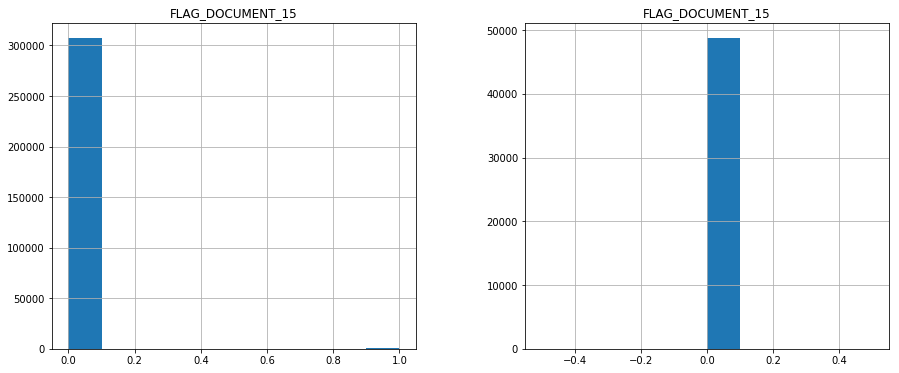

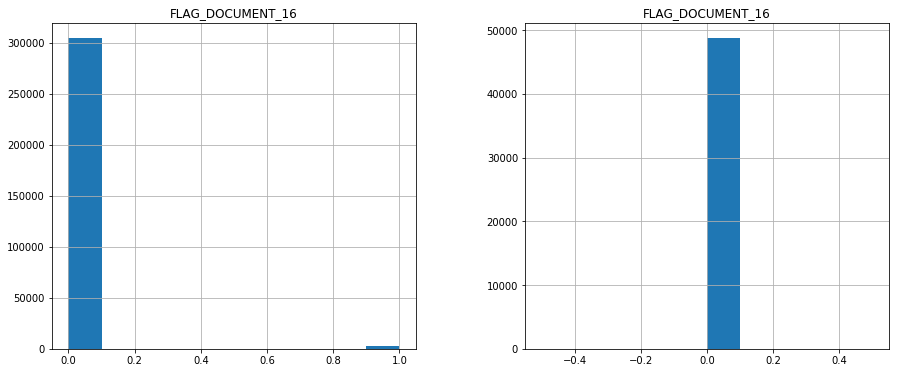

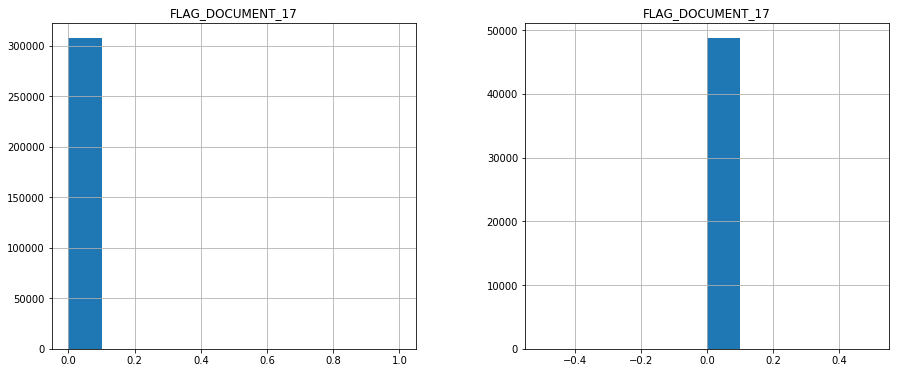

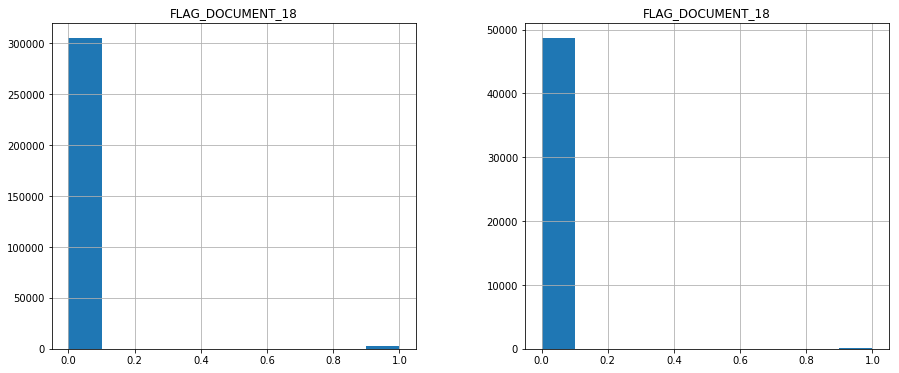

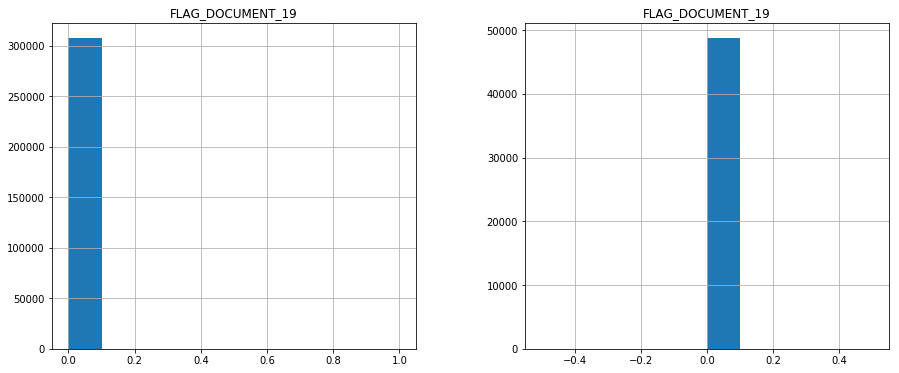

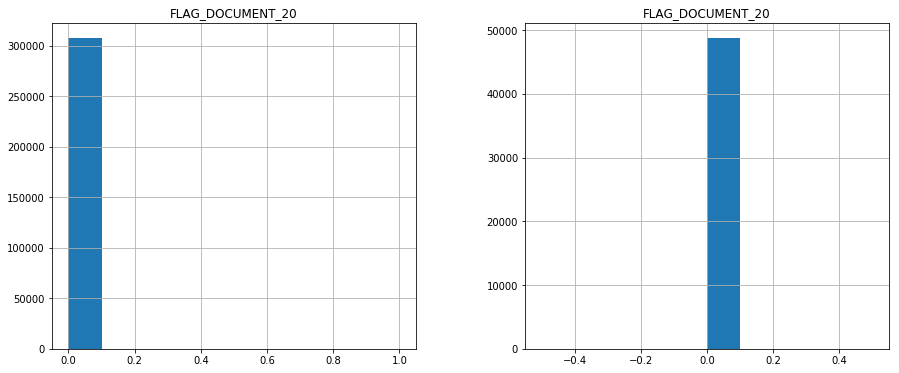

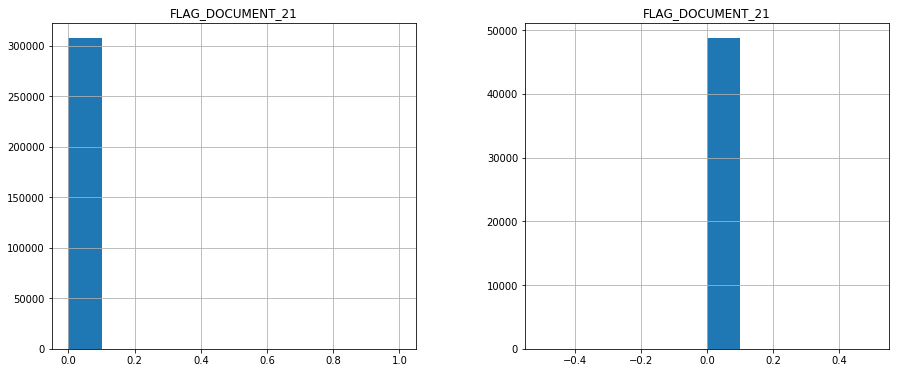

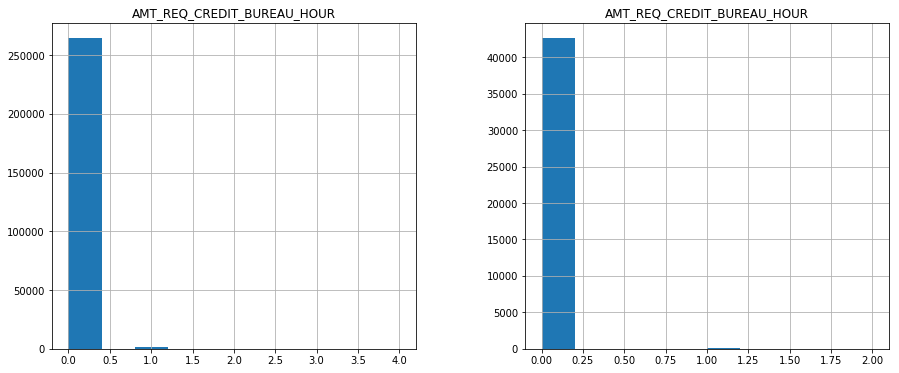

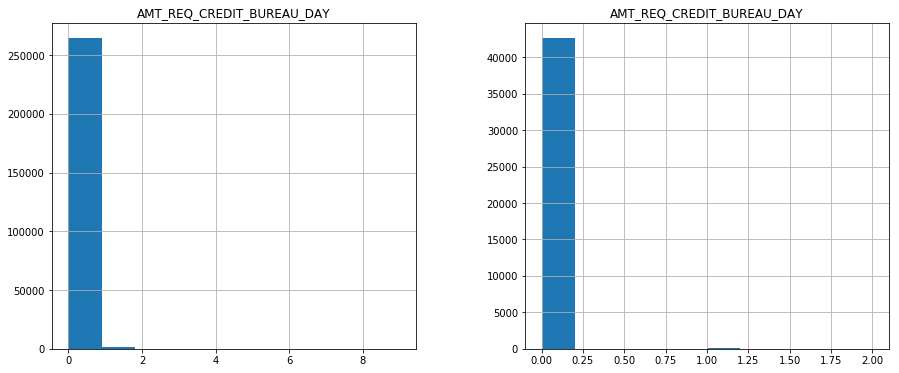

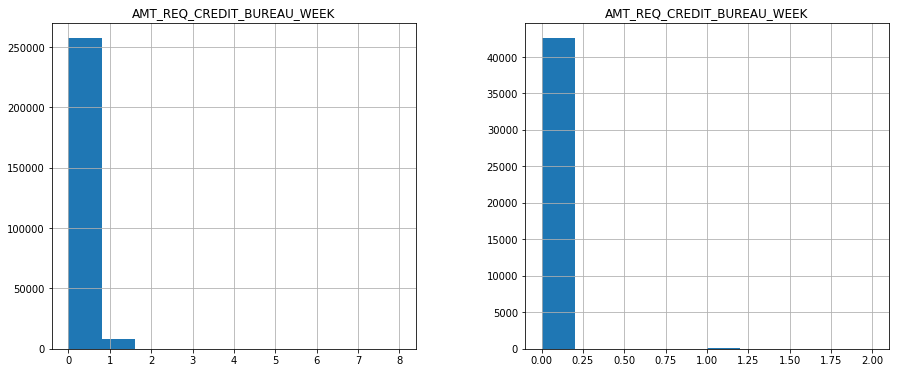

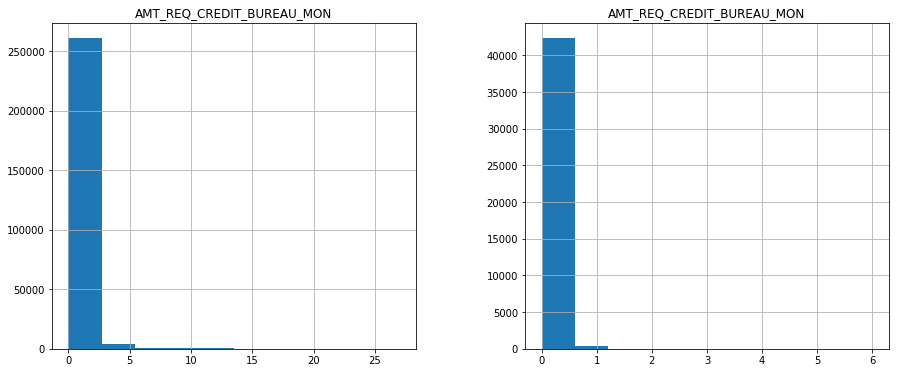

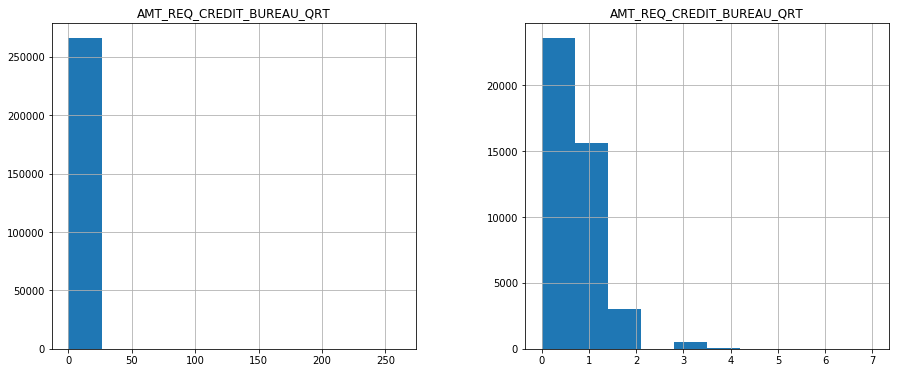

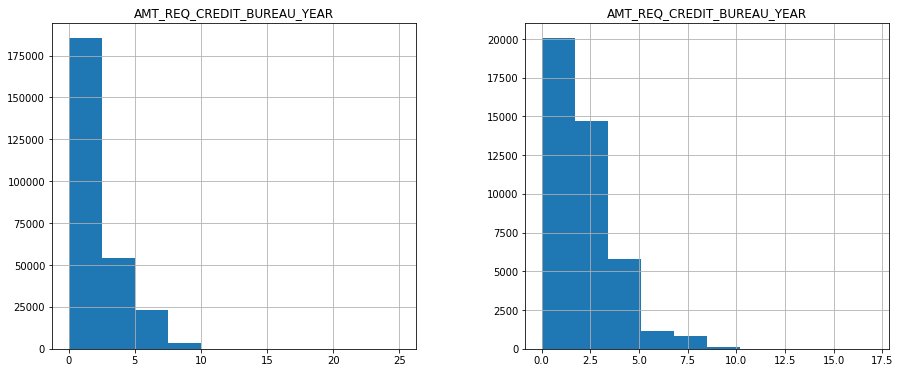

In [62]:
for i in application_train.columns:
    if application_train[i].dtype != "object":
        if i in application_test.columns:
            fig, axes = plt.subplots(1,2)
            application_train.hist(column = i, ax = axes[0])
            application_test.hist(column =i, ax = axes[1])

In [33]:


print(describeCompare(application_train, application_test, 'AMT_CREDIT'))
print(application_train.AMT_CREDIT.skew())
print(application_test.AMT_CREDIT.skew())
#AMT_CREDIT appears to have heavier tail in test data

print(describeCompare(application_train, application_test, 'AMT_ANNUITY'))
print(application_train.AMT_ANNUITY.skew())
print(application_test.AMT_ANNUITY.skew())


print(describeCompare(application_train, application_test, 'AMT_GOODS_PRICE'))
print(application_train.AMT_GOODS_PRICE.skew())
print(application_test.AMT_GOODS_PRICE.skew())

   index  AMT_CREDIT_x  AMT_CREDIT_y
0  count  3.075110e+05  4.874400e+04
1   mean  5.990260e+05  5.167404e+05
2    std  4.024908e+05  3.653970e+05
3    min  4.500000e+04  4.500000e+04
4    25%  2.700000e+05  2.606400e+05
5    50%  5.135310e+05  4.500000e+05
6    75%  8.086500e+05  6.750000e+05
7    max  4.050000e+06  2.245500e+06
1.2347784971349398
1.6488309851235012
   index  AMT_ANNUITY_x  AMT_ANNUITY_y
0  count  307499.000000   48720.000000
1   mean   27108.573909   29426.240209
2    std   14493.737315   16016.368315
3    min    1615.500000    2295.000000
4    25%   16524.000000   17973.000000
5    50%   24903.000000   26199.000000
6    75%   34596.000000   37390.500000
7    max  258025.500000  180576.000000
1.5797773638612507
1.4743723052041933
   index  AMT_GOODS_PRICE_x  AMT_GOODS_PRICE_y
0  count       3.072330e+05       4.874400e+04
1   mean       5.383962e+05       4.626188e+05
2    std       3.694465e+05       3.367102e+05
3    min       4.050000e+04       4.500000e+04
4    

Populating the interactive namespace from numpy and matplotlib


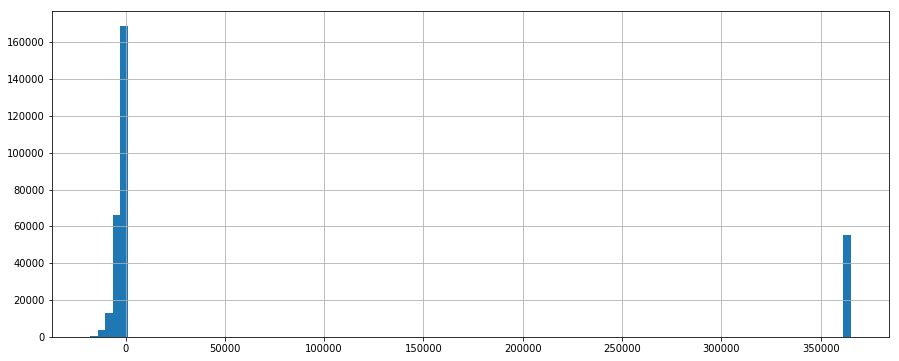

In [37]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
application_train.DAYS_EMPLOYED.hist(bins = 100)
#

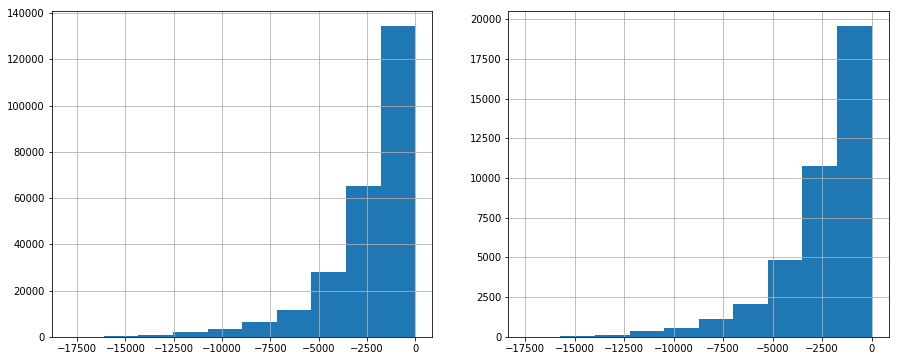

In [42]:
fig, axes = plt.subplots(1,2)

application_train.DAYS_EMPLOYED[application_train.DAYS_EMPLOYED < 350000].hist(ax = axes[0])
application_test.DAYS_EMPLOYED[application_test.DAYS_EMPLOYED < 350000].hist(ax = axes[1])

1

## Review correlations

In [17]:
application_train.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,-0.009745,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.032748,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.013367,0.002364,-0.000045,0.003437,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,0.044498,0.003614,0.009015,0.027282,0.005285,0.002255,-0.001336,0.001372,-0.011799,-0.071983
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.040396,-0.010040,-0.010135,-0.008396,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988


In [23]:
application_train.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

Populating the interactive namespace from numpy and matplotlib


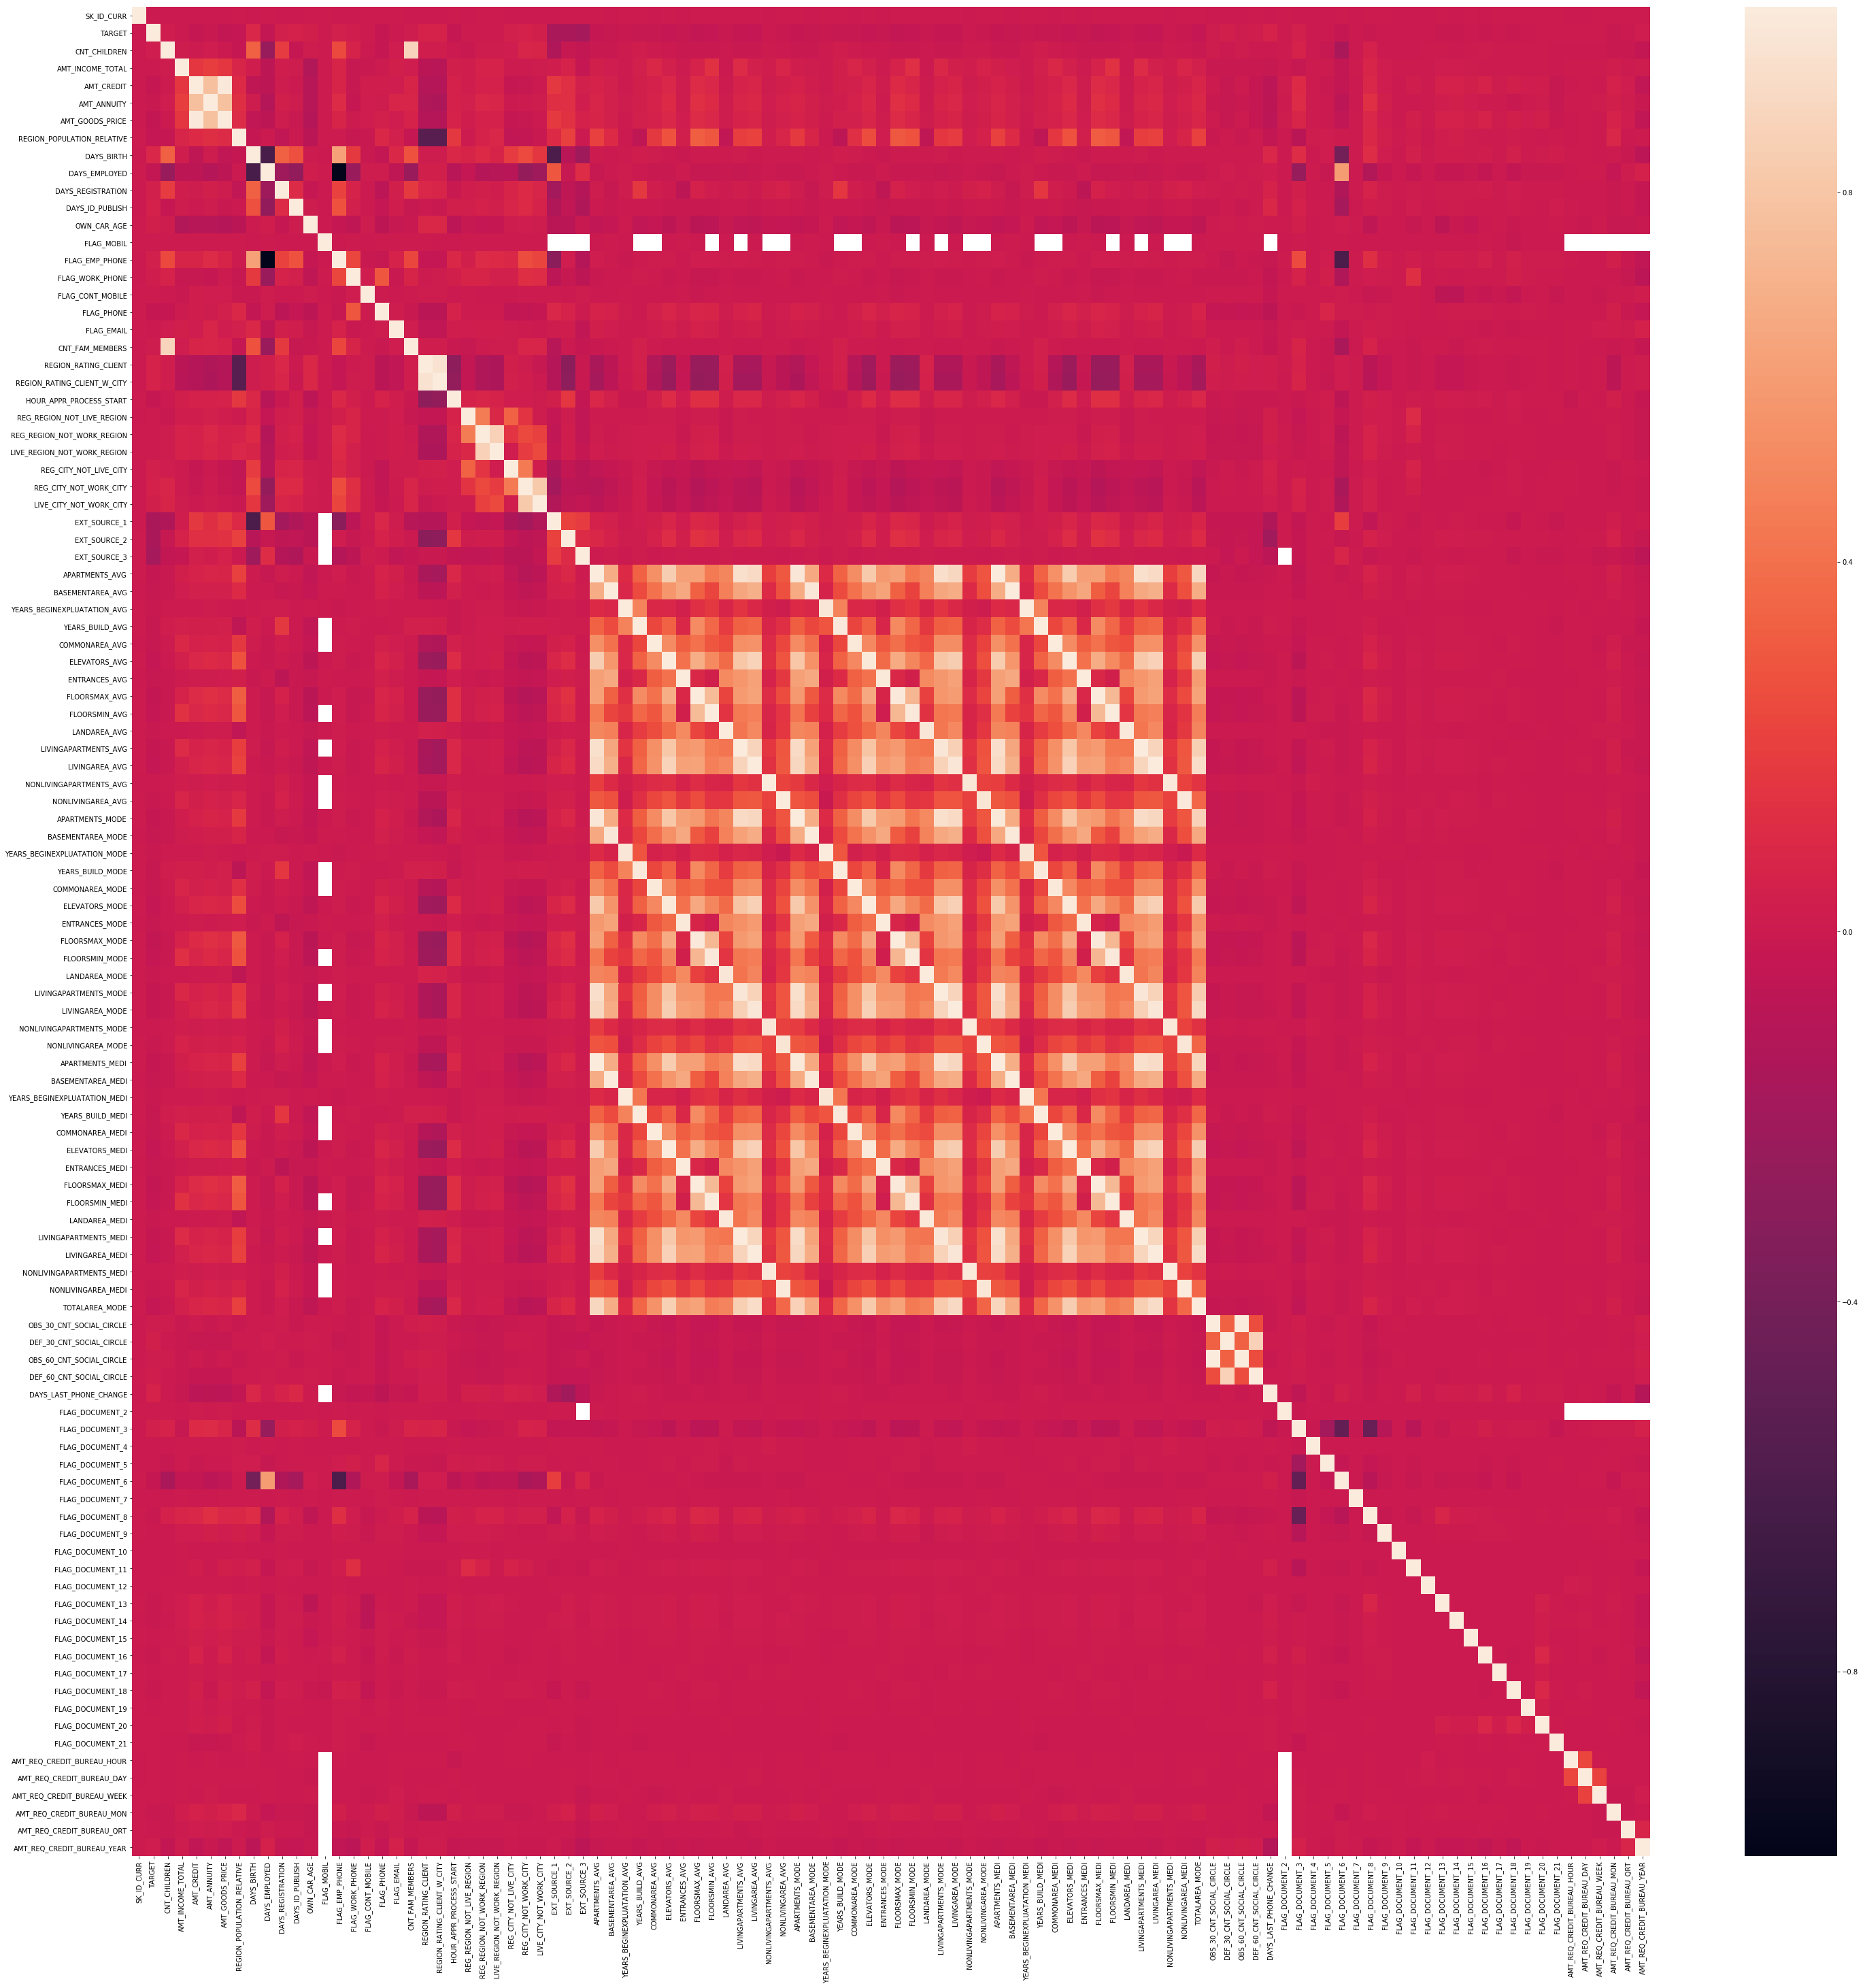

In [21]:
%pylab inline
pylab.rcParams['figure.figsize'] = (50,50)


sns.heatmap(application_train.corr())

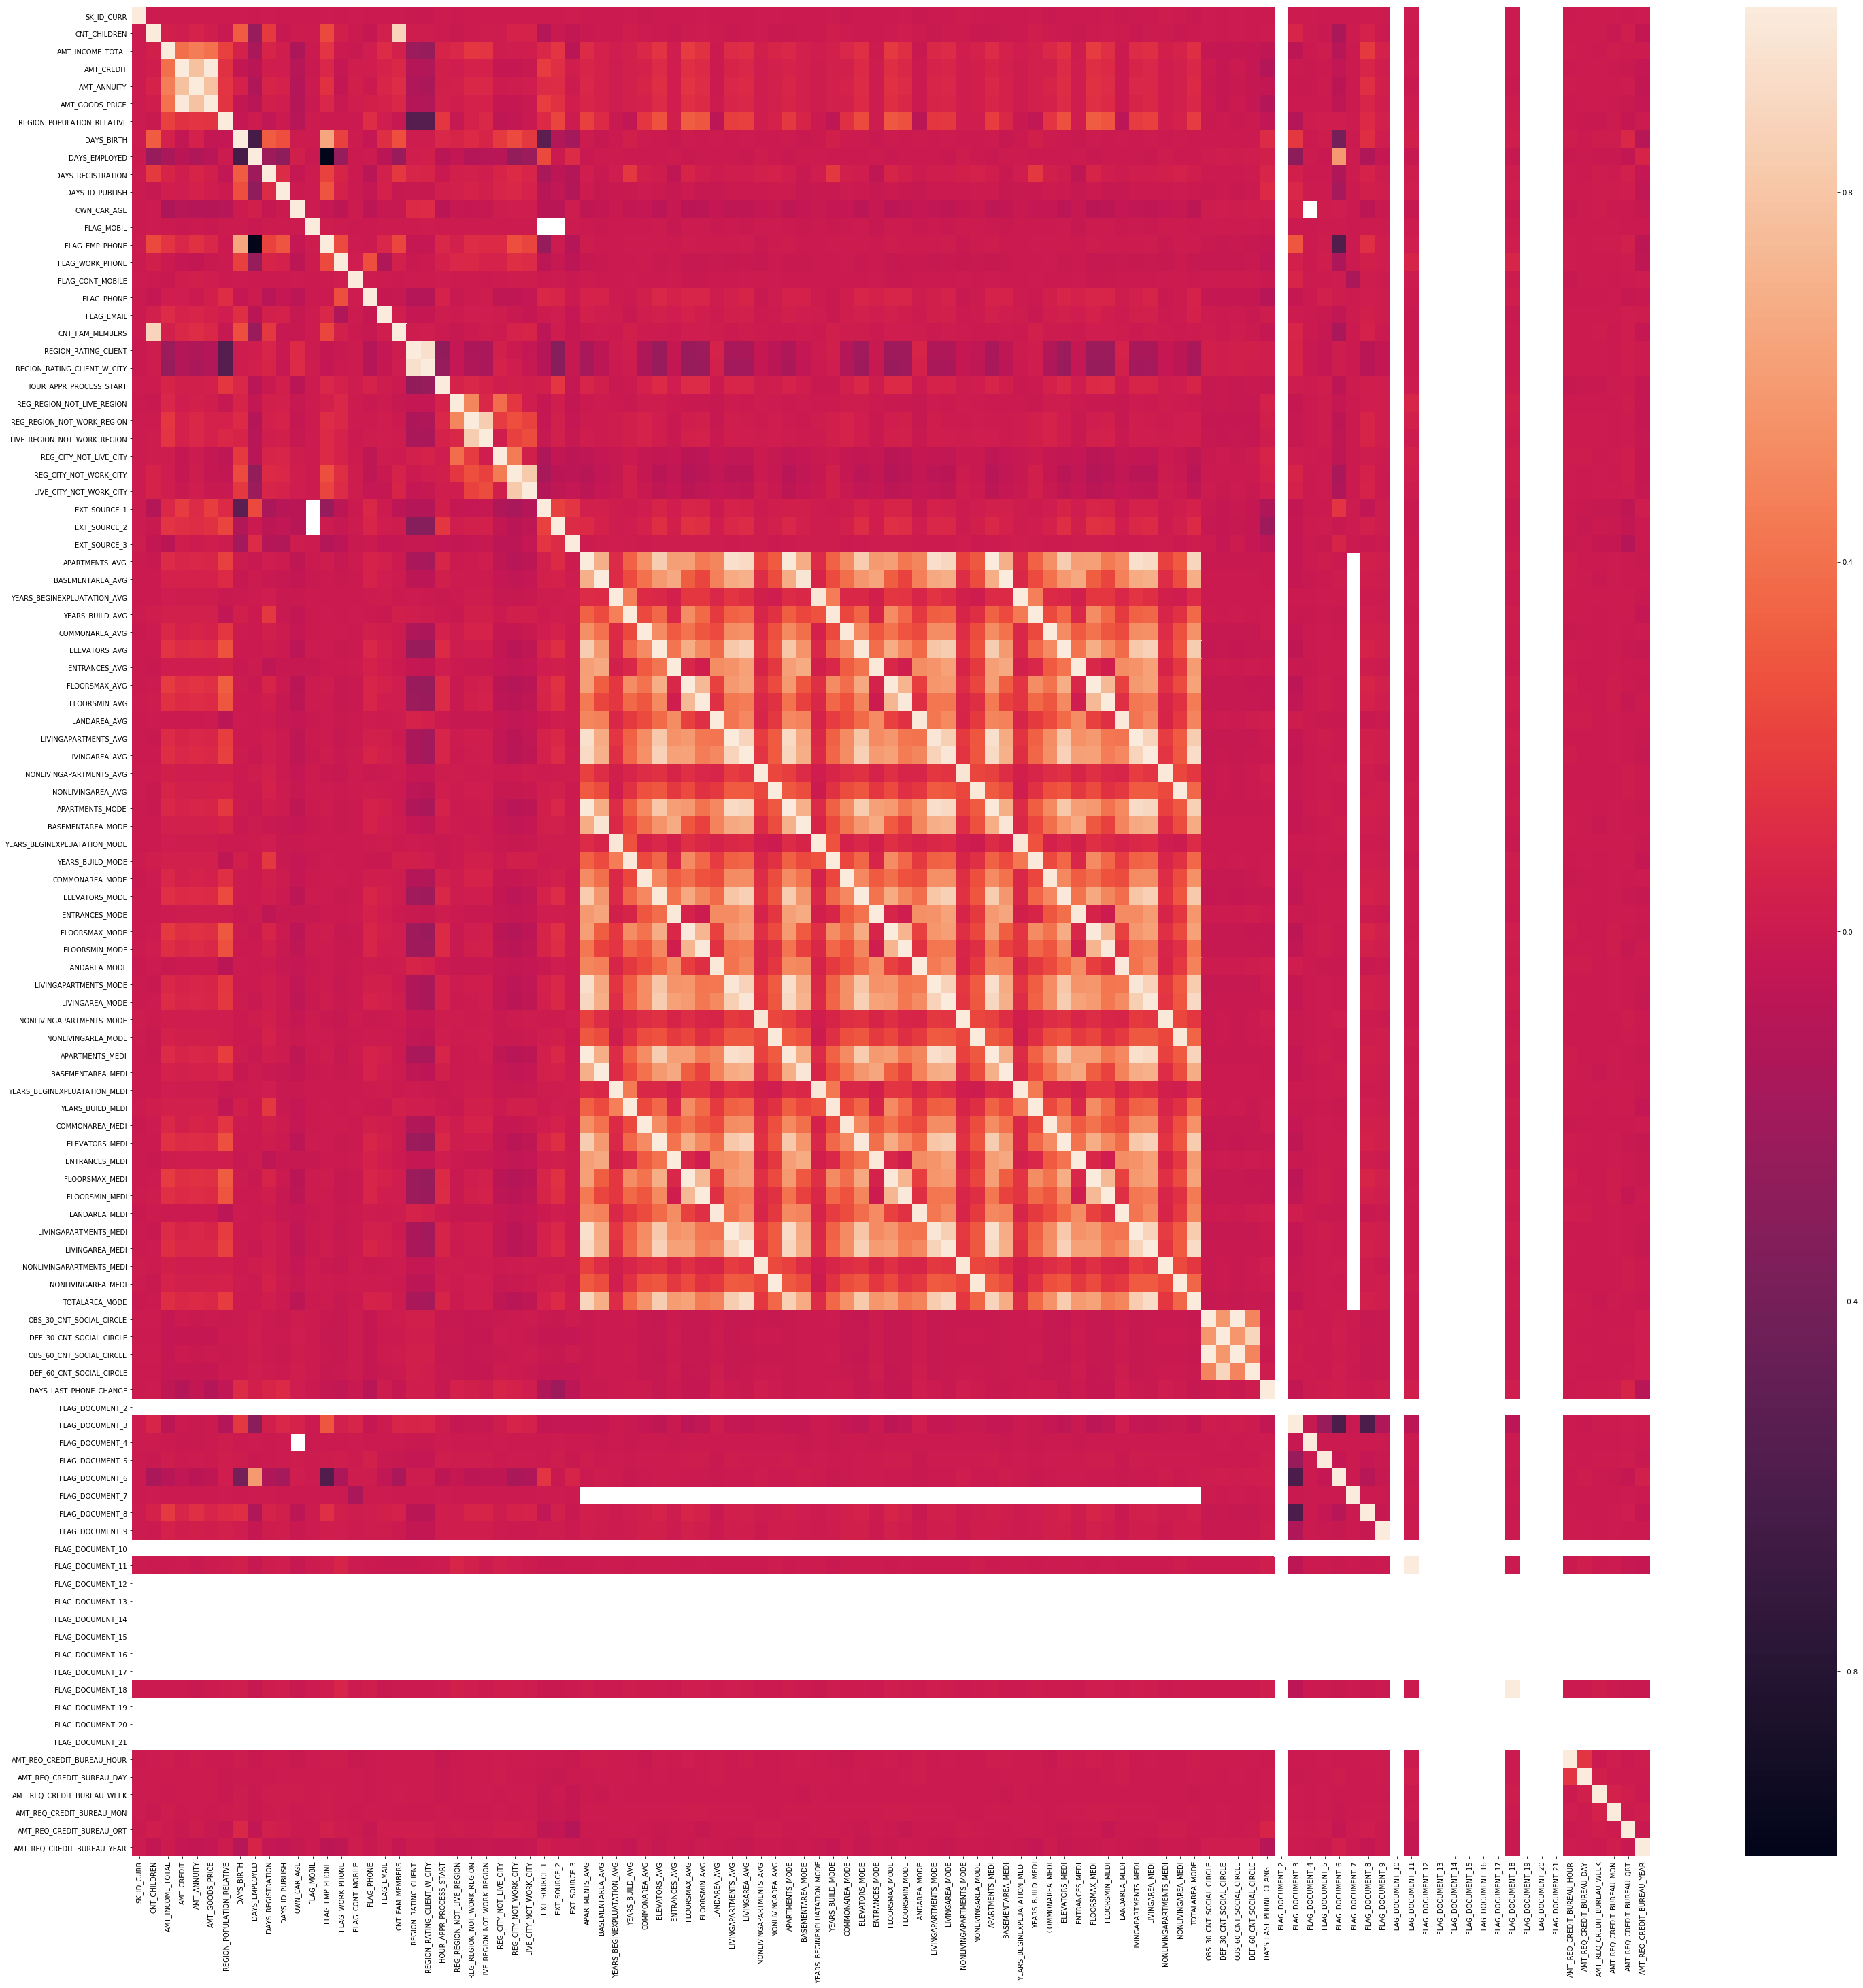

In [22]:
sns.heatmap(application_test.corr())

## Distribution of number of credit histories

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7741fa9e8>]],
      dtype=object)

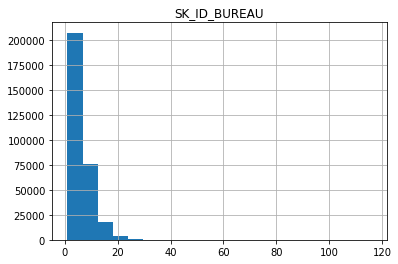

In [21]:
bureau.groupby(['SK_ID_CURR']).count().hist(column='SK_ID_BUREAU', bins = 20)

In [15]:
bureau.head(20)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN
